In [1]:
# IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
import io
import base64
from matplotlib import rc,animation
from mpl_toolkits.mplot3d import Axes3D
#from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
print(os.listdir("."))

['.ipynb_checkpoints', 'application_test.csv', 'application_train.csv', 'Complete-Data-Set.zip', 'jigyasa_yadav_071197_code_1.csv', 'loan-repayers-v-s-loan-defaulters-home-credit-Copy1.ipynb', 'loan-repayers-v-s-loan-defaulters-home-credit.ipynb', 'Untitled.ipynb']


# Importing Data

In [2]:
application_train     = pd.read_csv(r"application_train.csv")
application_test      = pd.read_csv(r"application_test.csv")


# Data Dimensions

In [3]:
print ("application_train     :",application_train.shape)
print ("application_test      :",application_test.shape)


application_train     : (257512, 122)
application_test      : (49999, 121)


# First Few rows of Data

In [4]:
display("application_train")
display(application_train.head(3))
display("application_test")
display(application_test.head(3))


'application_train'

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,157876,0,Cash loans,F,N,Y,0,67500.0,343800.0,16155.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,157878,0,Cash loans,M,Y,N,2,247500.0,945000.0,40167.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
2,157879,0,Revolving loans,M,N,Y,2,180000.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


'application_test'

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Percentage of Missing values in application train and test data

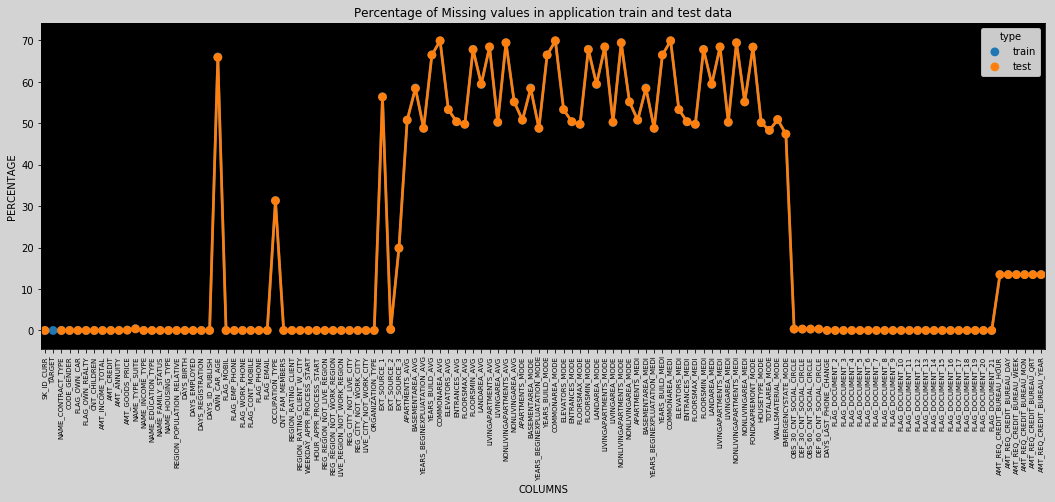

In [5]:
fig = plt.figure(figsize=(18,6))
miss_train = pd.DataFrame((application_train.isnull().sum())*100/application_train.shape[0]).reset_index()
miss_test = pd.DataFrame((application_test.isnull().sum())*100/application_test.shape[0]).reset_index()
miss_train["type"] = "train"
miss_test["type"]  =  "test"
missing = pd.concat([miss_train,miss_test],axis=0)
ax = sns.pointplot("index",0,data=missing,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application train and test data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

# Percentage of missing values in other data sets

Text(0.5, 1.0, 'train')

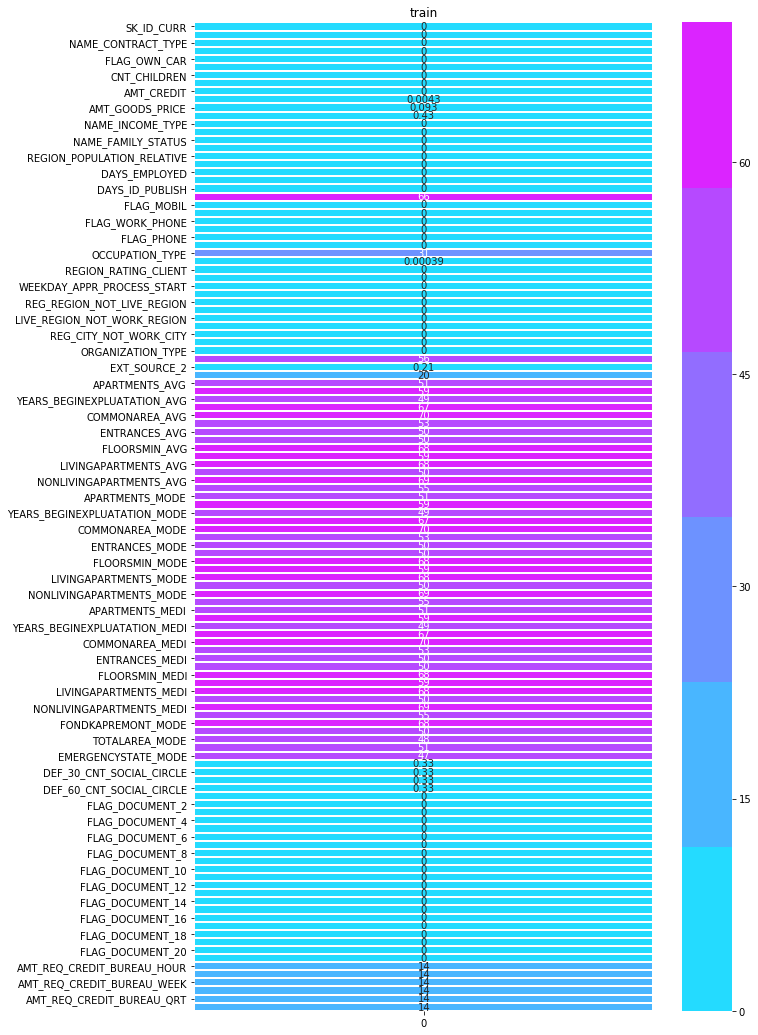

In [6]:
#Percentage of missing values in other data sets¶
plt.figure(figsize=(35,40))

plt.subplot(231)
sns.heatmap(pd.DataFrame(application_train.isnull().sum()/application_train.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("train")

# Distribution of Target variable
>TARGET :Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in sample, 0 - all other cases)                                                                                                                                                                                                                                                                                                
>8% out  of total client  population  have difficulties in repaying loans.                                    

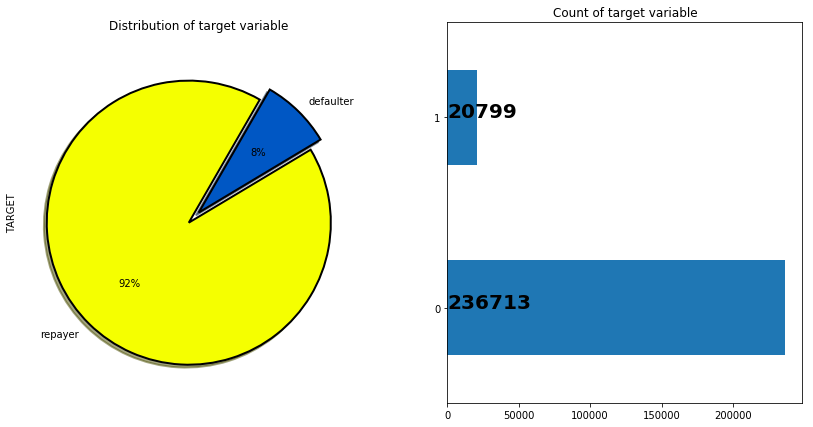

In [7]:
plt.figure(figsize=(14,7))
plt.subplot(121)
application_train["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = application_train["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(application_train["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

In [8]:
#Concatenating train and test data
application_train_x = application_train[[x for x in application_train.columns if x not in ["TARGET"]]]
application_train_x["type"] = "train"
application_test["type"]    = "test"
data = pd.concat([application_train_x,application_test],axis=0) 

# Distribution in Contract types in training and test data
>NAME_CONTRACT_TYPE :	Identification if loan is cash or revolving
>In training data the percentage of revolving loans and cash loans are 10% & 90%.                                                                                                                                                                           
>In test data the percentage of revolving loans and cash loans are 1% & 99%.                                                                                                                                                                              

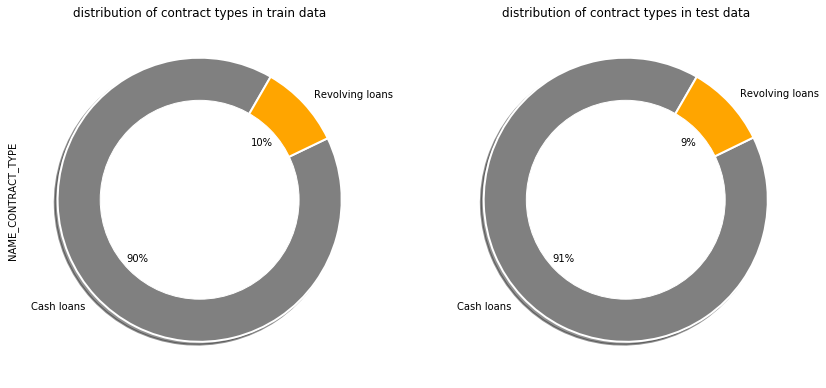

In [9]:
plt.figure(figsize=(14,7))
plt.subplot(121)
data[data["type"] == "train"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["grey","orange"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("distribution of contract types in train data")

plt.subplot(122)
data[data["type"] == "test"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["grey","orange"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.ylabel("")
plt.title("distribution of contract types in test data")
plt.show()

# Gender Distribution  in training and test data
>Train data - Male : 66% ,FEMALE : 34%    , Test data - Male : 67% ,FEMALE : 33% 

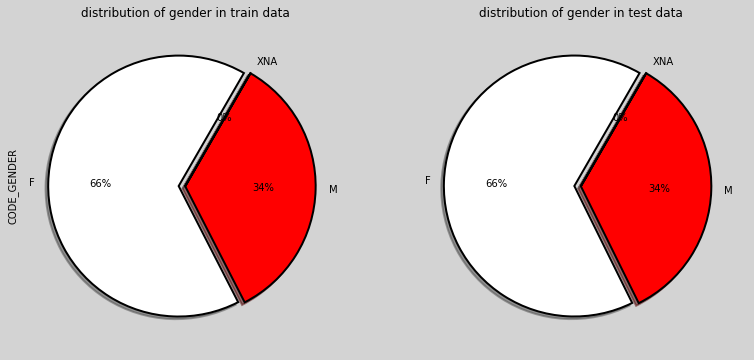

In [10]:
#GENDER
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
data[data["type"] == "train"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["white","r"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of gender in train data")

plt.subplot(122)
data[data["type"] == "test"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["white","r"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.ylabel("")
plt.title("distribution of gender in test data")
fig.set_facecolor("lightgrey")

# Distribution of Contract type by gender

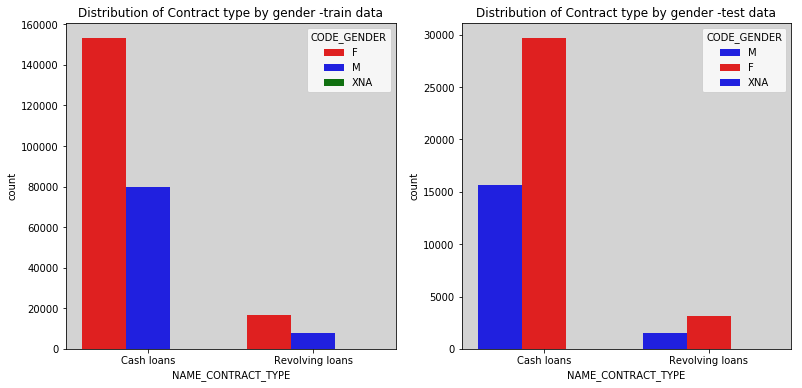

In [11]:
fig  = plt.figure(figsize=(13,6))
plt.subplot(121)
ax = sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=data[data["type"] == "train"],palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender -train data")

plt.subplot(122)
ax1 = sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=data[data["type"] == "test"],palette=["b","r"])
ax1.set_facecolor("lightgrey")
ax1.set_title("Distribution of Contract type by gender -test data")
plt.show()

# Distribution of client owning a car and by gender
>FLAG_OWN_CAR	Flag if the client owns a car .                                                                                                                                                                                                                                   
>SUBPLOT 1 : Distribution of client owning a car . 34% of clients own a car .                                                                                                                                                                                    
>SUBPLOT 1 : Distribution of client owning a car by gender .  Out of total clients who own car 57% are male and 43% are female.                                                                                        

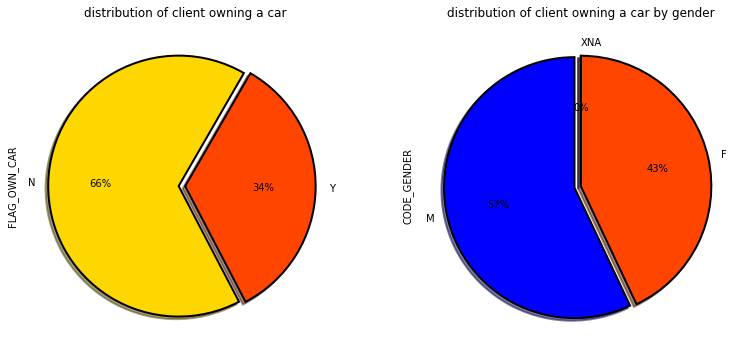

In [12]:
fig = plt.figure(figsize=(13,6))

plt.subplot(121)
data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["gold","orangered"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("distribution of client owning a car")

plt.subplot(122)
data[data["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["b","orangered"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of client owning a car by gender")

plt.show()

# Distribution of client owning a house or flat and by gender
>FLAG_OWN_REALTY - Flag if client owns a house or flat                                                                                                                                                                                                                     
>SUBPLOT 1 : Distribution of client owning a house or flat  . 69% of clients own a flat or house .                                                                                                                                                 
>SUBPLOT 1 : Distribution of client owning a house or flat by gender .  Out of total clients who own house 67% are female and 33% are male.      

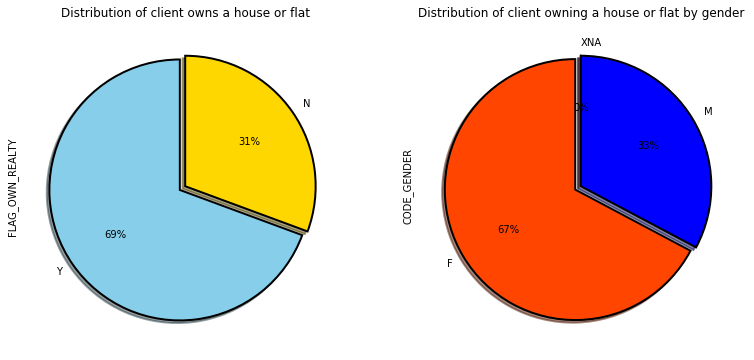

In [13]:
plt.figure(figsize=(13,6))
plt.subplot(121)
data["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0],shadow =True)
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
data[data["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orangered","b"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of client owning a house or flat by gender")
plt.show()

# Distribution of Number of children and family members of client by repayment status.
>CNT_CHILDREN - Number of children the client has.                                                                                                                                                                                                                          
>CNT_FAM_MEMBERS	- How many family members does client have.

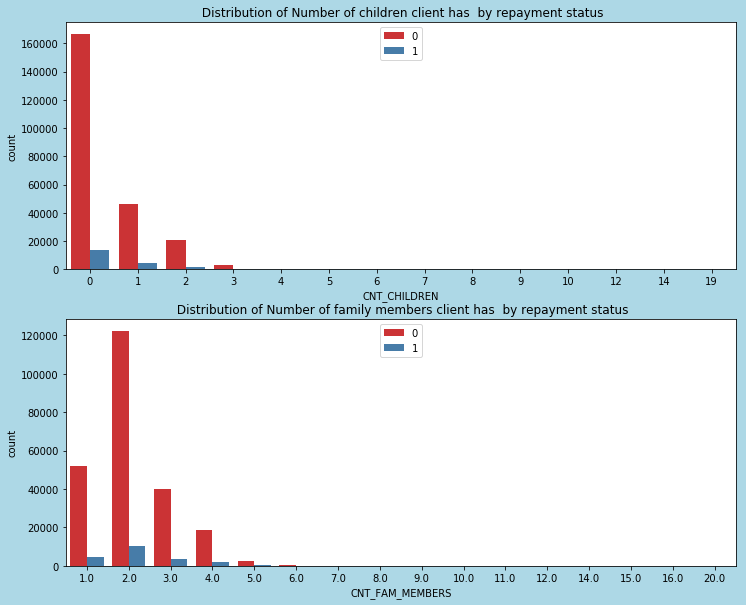

In [14]:
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(application_train["CNT_CHILDREN"],palette="Set1",hue=application_train["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of children client has  by repayment status")
plt.subplot(212)
sns.countplot(application_train["CNT_FAM_MEMBERS"],palette="Set1",hue=application_train["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")
fig.set_facecolor("lightblue")

## Distribution of contract type ,gender ,own car ,own house with respect to Repayment status(Target variable)
>Percentage of males is 10%  more in defaults than non defaulters.

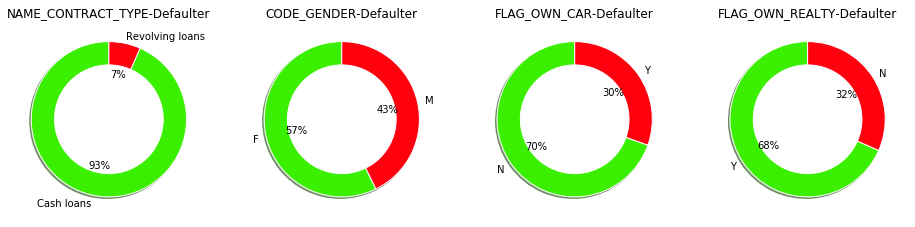

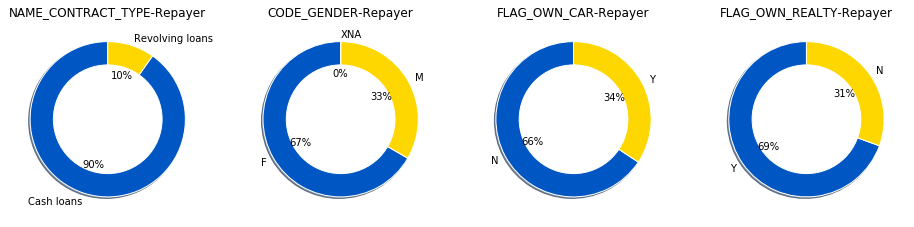

In [15]:
default = application_train[application_train["TARGET"]==1][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
non_default = application_train[application_train["TARGET"]==0][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")


# Distribution of amount data 
>AMT_INCOME_TOTAL - Income of the client                                                                                                                                                                                                                                         
>AMT_CREDIT                - Credit amount of the loan                                                                                                                                                                                                                               
>AMT_ANNUITY             - Loan annuity                                                                                                                                                                                                                                                 
>AMT_GOODS_PRICE   - For consumer loans it is the price of the goods for which the loan is given                                                                                                                                          

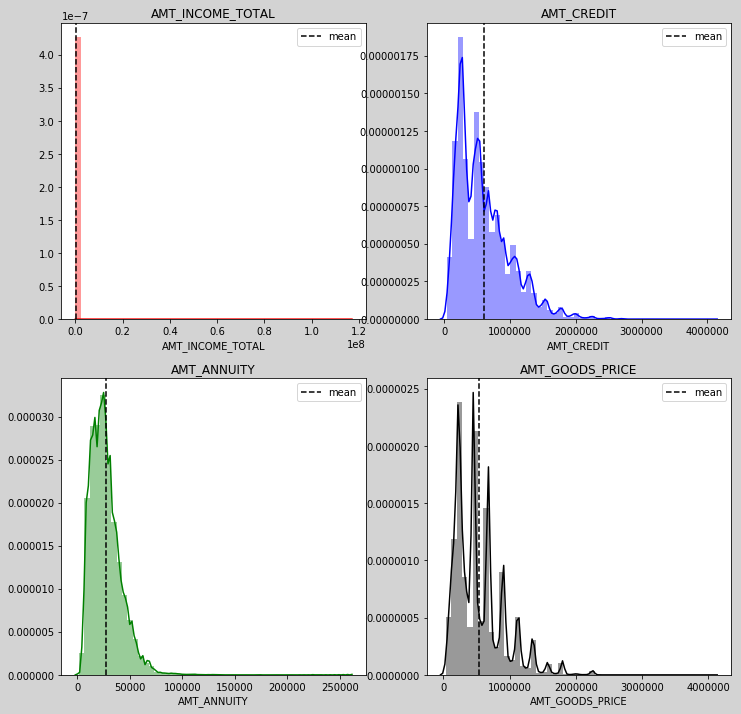

In [16]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']
length = len(cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(12,12))
ax.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(data[data[i].notnull()][i],color=k)
    plt.axvline(data[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)

# Comparing summary statistics between defaulters and non - defaulters for loan amounts .
>Income of client  -                                                                                                                                                                                                                                                                            
1  . average income of clients who default and who do not are almost same.                                                                                                                                                                                
2 . standard deviation in income of client who default is very high compared to who do not default.
3 . clients who default also has maximum income earnings

>Credit amount of the loan ,Loan annuity,Amount goods price -                                                                                                                                                                                                           
1 .statistics between  credit amounts,Loan annuity and Amount goods price given to cilents who default and who dont are almost similar.

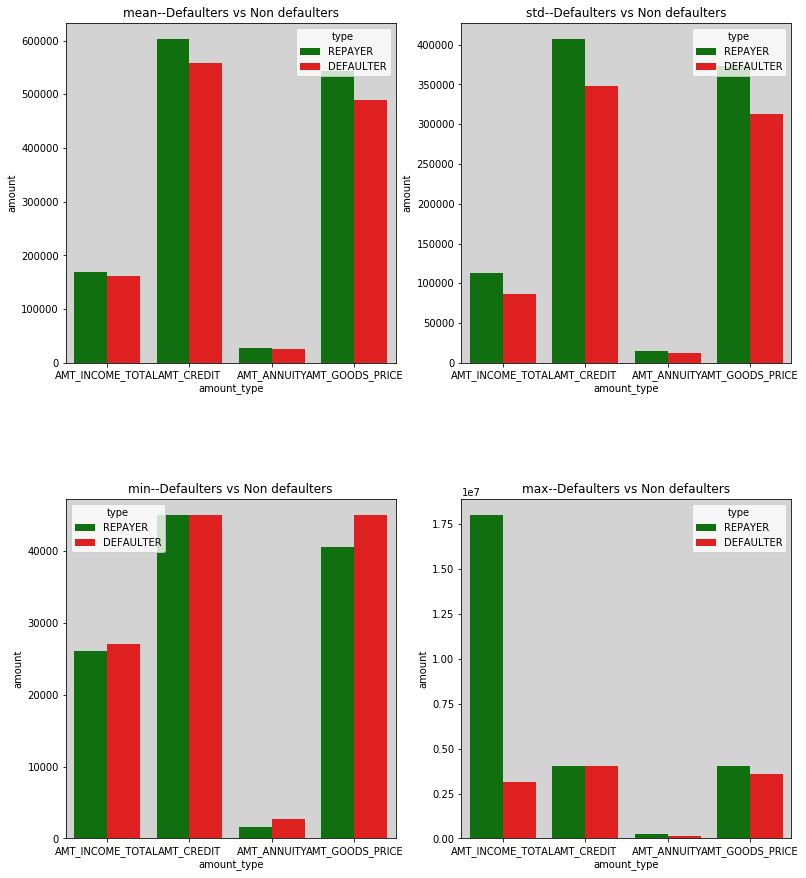

In [17]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

df = application_train.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 
df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x,df_y],axis = 0)

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(13,15))

for i,j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df_new[df_new["statistic"] == i]["amount_type"],df_new[df_new["statistic"] == i]["amount"],
                hue=df_new[df_new["statistic"] == i]["type"],palette=["g","r"])
    plt.title(i + "--Defaulters vs Non defaulters")
    plt.subplots_adjust(hspace = .4)
    fig.set_facecolor("lightgrey")

# Average Income,credit,annuity & goods_price by gender

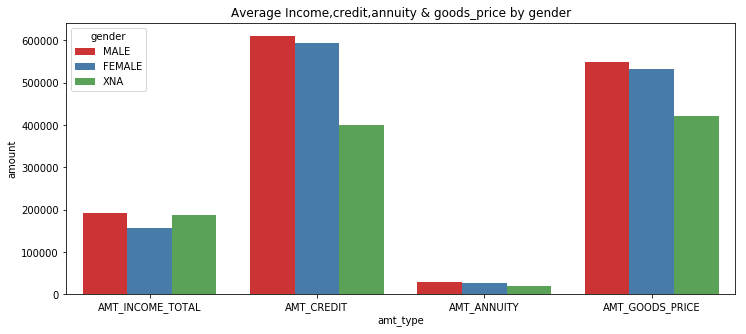

In [18]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

df1 = data.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

df_f   = df1[["index","F"]]
df_f   = df_f.rename(columns={'index':"amt_type", 'F':"amount"})
df_f["gender"] = "FEMALE"
df_m   = df1[["index","M"]]
df_m   = df_m.rename(columns={'index':"amt_type", 'M':"amount"})
df_m["gender"] = "MALE"
df_xna = df1[["index","XNA"]]
df_xna = df_xna.rename(columns={'index':"amt_type", 'XNA':"amount"})
df_xna["gender"] = "XNA"

df_gen = pd.concat([df_m,df_f,df_xna],axis=0)

plt.figure(figsize=(12,5))
ax = sns.barplot("amt_type","amount",data=df_gen,hue="gender",palette="Set1")
plt.title("Average Income,credit,annuity & goods_price by gender")
plt.show()

# Scatter plot between credit amount and annuity amount

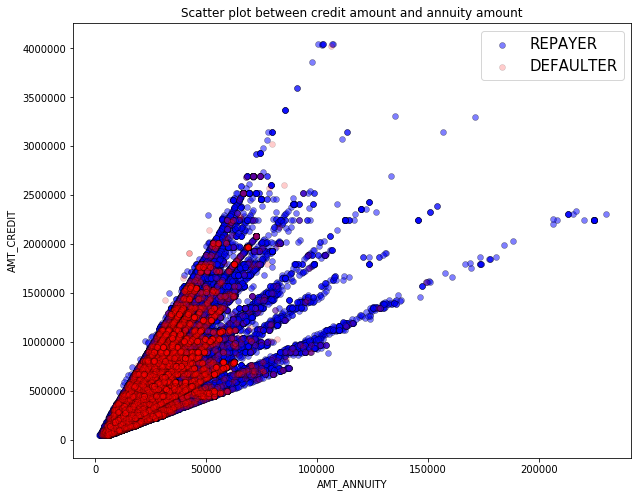

In [19]:
fig = plt.figure(figsize=(10,8))
plt.scatter(application_train[application_train["TARGET"]==0]['AMT_ANNUITY'],application_train[application_train["TARGET"]==0]['AMT_CREDIT'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(application_train[application_train["TARGET"]==1]['AMT_ANNUITY'],application_train[application_train["TARGET"]==1]['AMT_CREDIT'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

# Pair Plot between amount variables
>AMT_INCOME_TOTAL - Income of the client                                                                                                                                                                                                                                      
>AMT_CREDIT                - Credit amount of the loan                                                                                                                                                                                                                               
>AMT_ANNUITY             - Loan annuity                                                                                                                                                                                                                                                 
>AMT_GOODS_PRICE   - For consumer loans it is the price of the goods for which the loan is given          

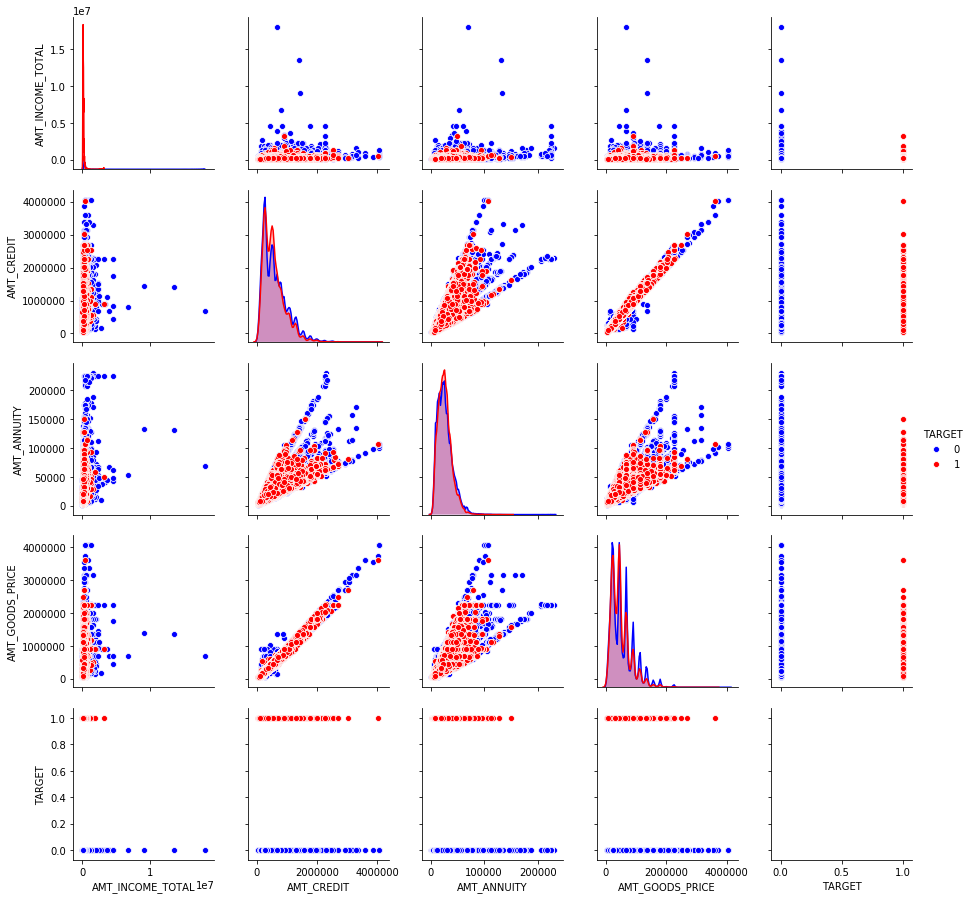

In [20]:
amt = application_train[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])
plt.show()

# Distribution of Suite type
>NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan.

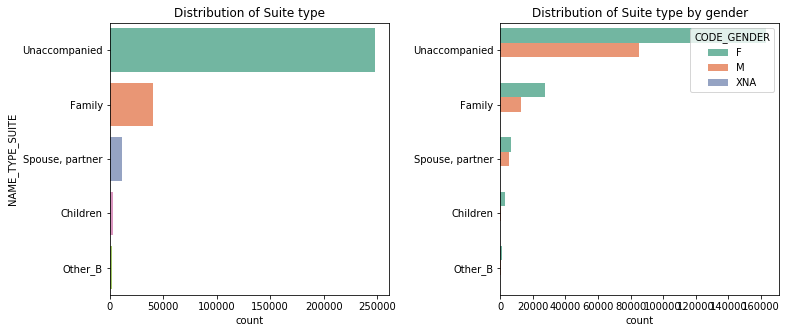

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(y=data["NAME_TYPE_SUITE"],
              palette="Set2",
              order=data["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.title("Distribution of Suite type")

plt.subplot(122)
sns.countplot(y=data["NAME_TYPE_SUITE"],
              hue=data["CODE_GENDER"],palette="Set2",
              order=data["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.ylabel("")
plt.title("Distribution of Suite type by gender")
plt.subplots_adjust(wspace = .4)

# Distribution of client income type
>NAME_INCOME_TYPE	Clients income type (businessman, working, maternity leave,…)

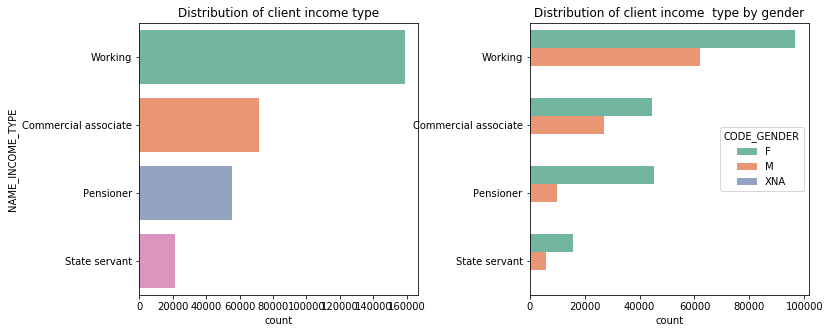

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(y=data["NAME_INCOME_TYPE"],
              palette="Set2",
              order=data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.title("Distribution of client income type")

plt.subplot(122)
sns.countplot(y=data["NAME_INCOME_TYPE"],
              hue=data["CODE_GENDER"],
              palette="Set2",
              order=data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.ylabel("")
plt.title("Distribution of client income  type by gender")
plt.subplots_adjust(wspace = .4)

# Distribution of Education type by loan repayment status
>NAME_EDUCATION_TYPE	Level of highest education the client achieved..                                                                                                                                                                            
>Clients who default have proportionally 9% less higher education compared to clients who do not default.

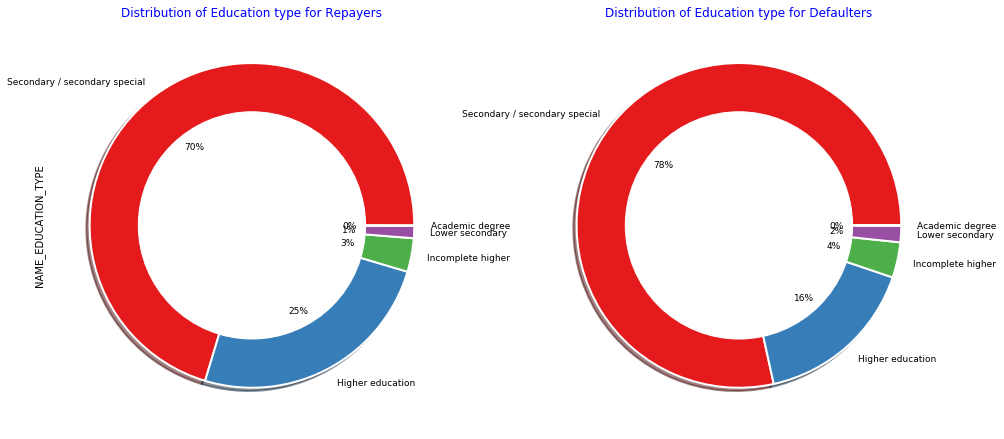

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(121)
application_train[application_train["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=9,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Repayers",color="b")

plt.subplot(122)
application_train[application_train["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=9,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Defaulters",color="b")
plt.ylabel("")
plt.show()

# Average Earnings by different professions and education types

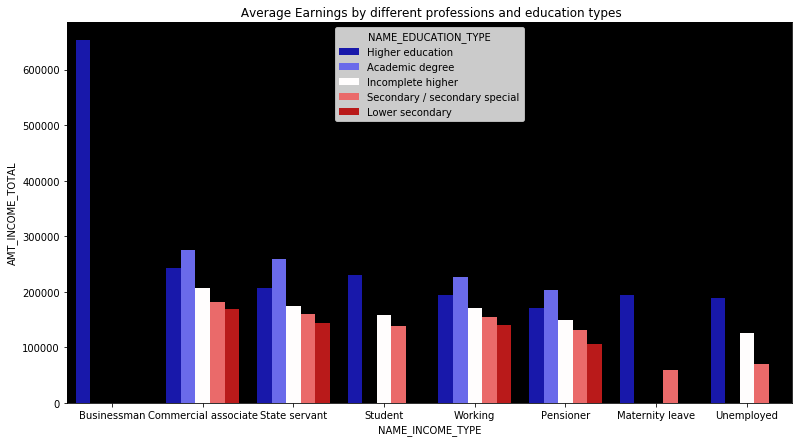

In [24]:
edu = data.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
fig = plt.figure(figsize=(13,7))
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE',palette="seismic")
ax.set_facecolor("k")
plt.title(" Average Earnings by different professions and education types")
plt.show()

# Distribution of Education type by loan repayment status
>NAME_FAMILY_STATUS - Family status of the client                                                                                                                                                                                            
>Percentage of single people are more in defaulters than non defaulters.

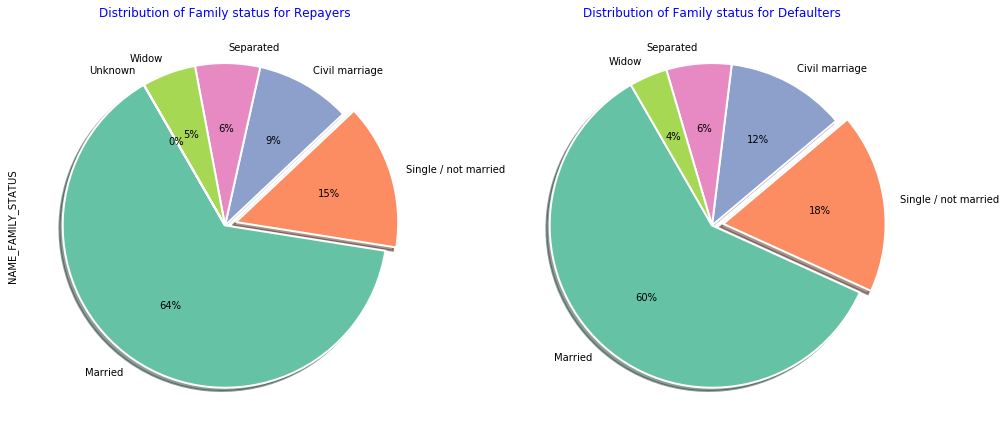

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(121)
application_train[application_train["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                             startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0,0])

plt.title("Distribution of Family status for Repayers",color="b")

plt.subplot(122)
application_train[application_train["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                    startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0])


plt.title("Distribution of Family status for Defaulters",color="b")
plt.ylabel("")
plt.show()

# Distribution of Housing type by loan repayment status
>NAME_HOUSING_TYPE - What is the housing situation of the client (renting, living with parents, ...)                                                                                          

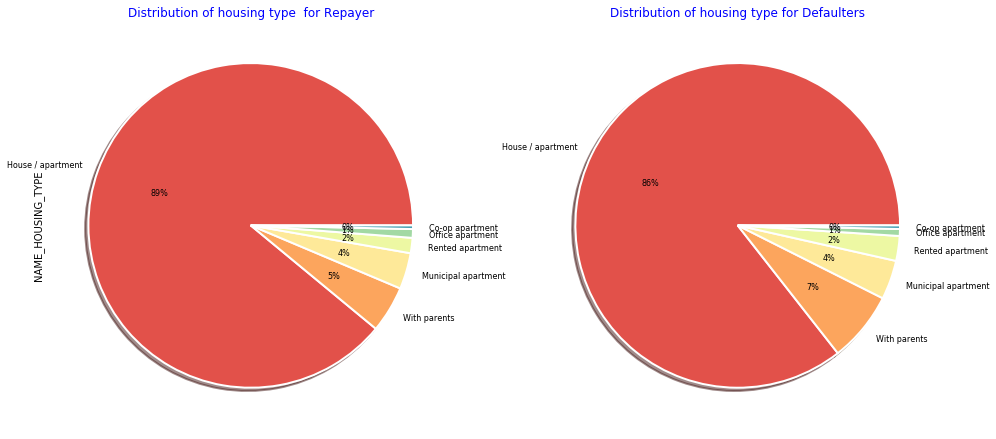

In [26]:
plt.figure(figsize=(16,8))
plt.subplot(121)
application_train[application_train["TARGET"]==0]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=8,
                                                             colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of housing type  for Repayer",color="b")

plt.subplot(122)
application_train[application_train["TARGET"]==1]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=8,
                                                    colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of housing type for Defaulters",color="b")
plt.ylabel("")
plt.show()

# Distribution normalized population of region where client lives by loan repayment status
>REGION_POPULATION_RELATIVE - Normalized population of region where client lives (higher number means the client lives in more populated region).                                    
>In High  population density regions people are less likely to default on loans.


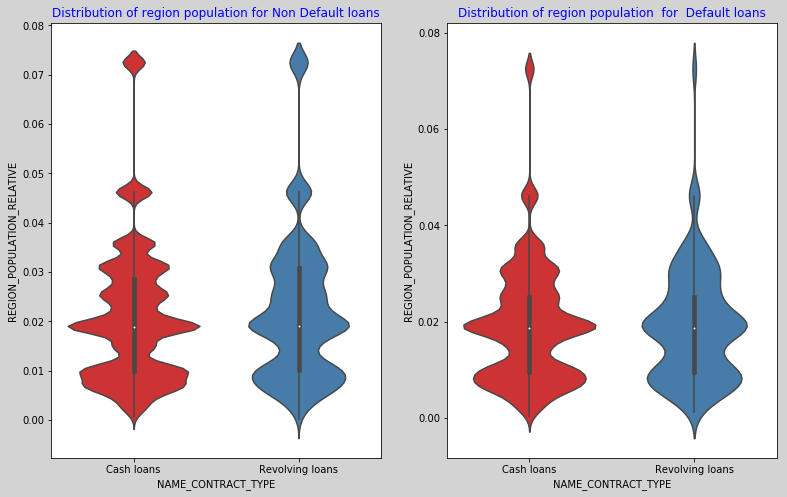

In [27]:
fig = plt.figure(figsize=(13,8))

plt.subplot(121)
sns.violinplot(y=application_train[application_train["TARGET"]==0]["REGION_POPULATION_RELATIVE"]
               ,x=application_train[application_train["TARGET"]==0]["NAME_CONTRACT_TYPE"],
               palette="Set1")
plt.title("Distribution of region population for Non Default loans",color="b")
plt.subplot(122)
sns.violinplot(y = application_train[application_train["TARGET"]==1]["REGION_POPULATION_RELATIVE"]
               ,x=application_train[application_train["TARGET"]==1]["NAME_CONTRACT_TYPE"]
               ,palette="Set1")
plt.title("Distribution of region population  for  Default loans",color="b")

plt.subplots_adjust(wspace = .2)
fig.set_facecolor("lightgrey")

# Client's age
>DAYS_BIRTH - Client's age in days at the time of application.                                                                                   
>average clients age is comparatively less in non repayers than repayers in every aspect.                                                                                                                                                     
>younger people  tend to default more than elder  people.

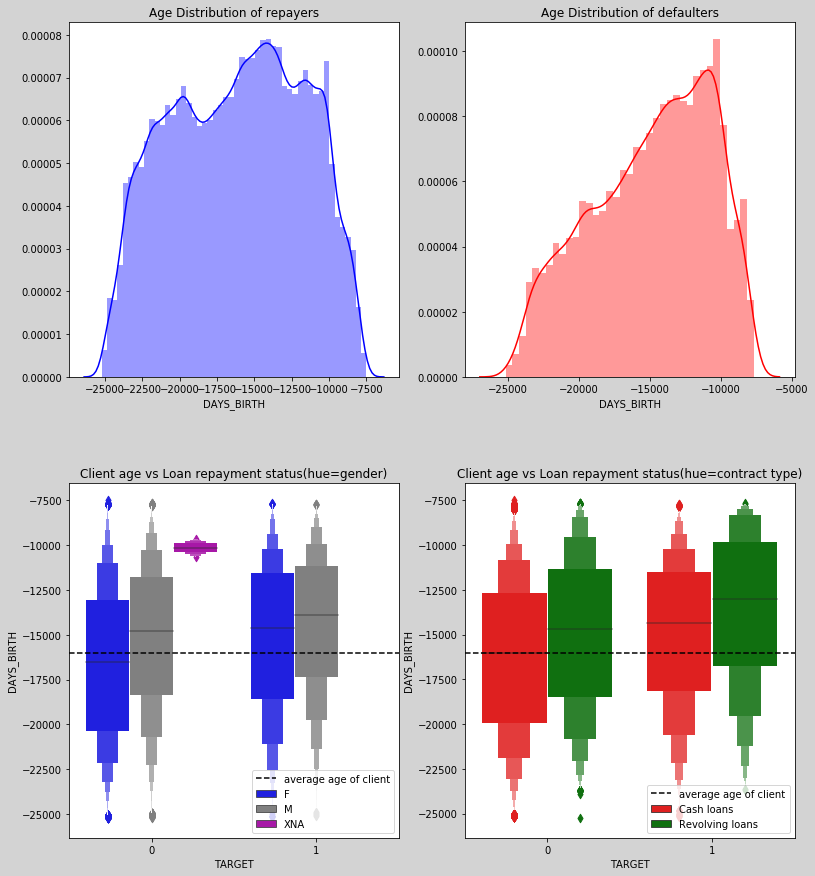

In [28]:
fig = plt.figure(figsize=(13,15))

plt.subplot(221)
sns.distplot(application_train[application_train["TARGET"]==0]["DAYS_BIRTH"],color="b")
plt.title("Age Distribution of repayers")

plt.subplot(222)
sns.distplot(application_train[application_train["TARGET"]==1]["DAYS_BIRTH"],color="r")
plt.title("Age Distribution of defaulters")

plt.subplot(223)
sns.lvplot(application_train["TARGET"],application_train["DAYS_BIRTH"],hue=application_train["CODE_GENDER"],palette=["b","grey","m"])
plt.axhline(application_train["DAYS_BIRTH"].mean(),linestyle="dashed",color="k",label ="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=gender)")

plt.subplot(224)
sns.lvplot(application_train["TARGET"],application_train["DAYS_BIRTH"],hue=application_train["NAME_CONTRACT_TYPE"],palette=["r","g"])
plt.axhline(application_train["DAYS_BIRTH"].mean(),linestyle="dashed",color="k",label ="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=contract type)")

plt.subplots_adjust(wspace = .2,hspace = .3)

fig.set_facecolor("lightgrey")

# Distribution of days employed for target variable.
>DAYS_EMPLOYED - How many days before the applicationfor target variable the person started current employment

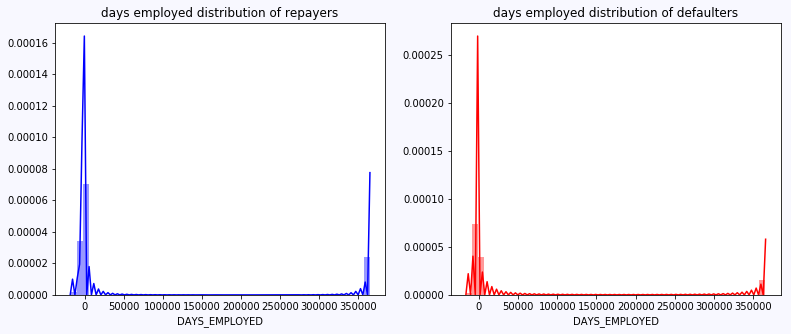

In [29]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(application_train[application_train["TARGET"]==0]["DAYS_EMPLOYED"],color="b")
plt.title("days employed distribution of repayers")

plt.subplot(122)
sns.distplot(application_train[application_train["TARGET"]==1]["DAYS_EMPLOYED"],color="r")
plt.title("days employed distribution of defaulters")

fig.set_facecolor("ghostwhite")

# Distribution of registration days for target variable.
>DAYS_REGISTRATION	How many days before the application did client change his registration

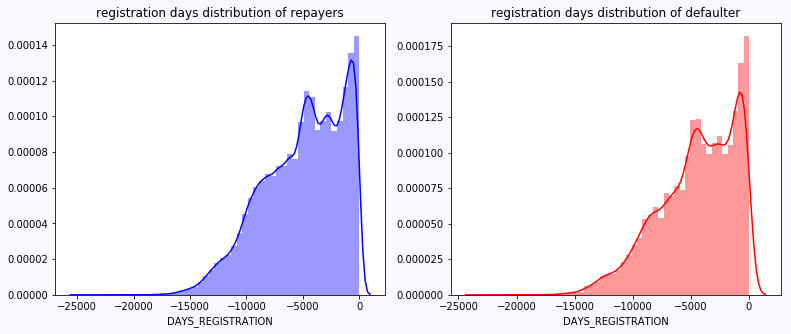

In [30]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(application_train[application_train["TARGET"]==0]["DAYS_REGISTRATION"],color="b")
plt.title("registration days distribution of repayers")

plt.subplot(122)
sns.distplot(application_train[application_train["TARGET"]==1]["DAYS_REGISTRATION"],color="r")
plt.title("registration days distribution of defaulter")

fig.set_facecolor("ghostwhite")

# Distribution of registration days for target variable.
>OWN_CAR_AGE  - Age of client's car.                                                                                                                                                                                                                                                      
>Mean car age of non repayers is slightly higher than repayers.

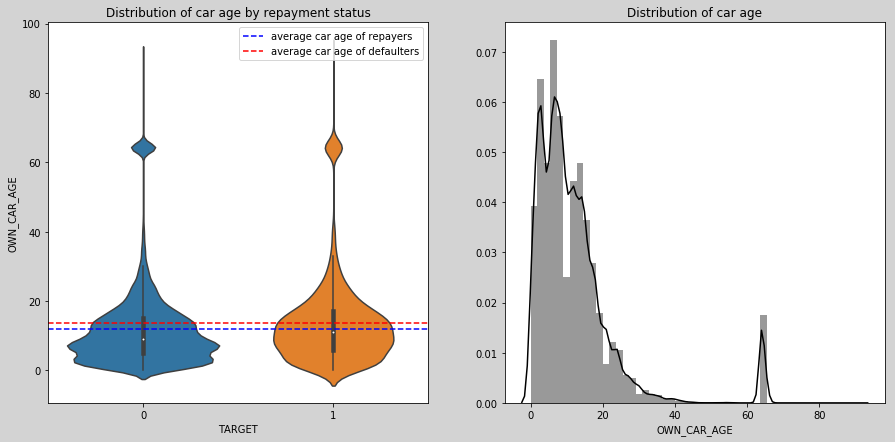

In [31]:
fig = plt.figure(figsize=(15,7))
plt.subplot(121)
sns.violinplot(y = application_train[application_train["OWN_CAR_AGE"].notnull()]["OWN_CAR_AGE"],
               x=application_train[application_train["OWN_CAR_AGE"].notnull()]["TARGET"])
plt.axhline(application_train[(application_train["OWN_CAR_AGE"].notnull())&(application_train["TARGET"] ==0)]["OWN_CAR_AGE"].mean(),color="b",
            linestyle="dashed",label = "average car age of repayers")
plt.axhline(application_train[(application_train["OWN_CAR_AGE"].notnull())&(application_train["TARGET"] ==1)]["OWN_CAR_AGE"].mean(),color="r",
            linestyle="dashed",label = "average car age of defaulters")
plt.legend(loc="best")
plt.title("Distribution of car age by repayment status")

plt.subplot(122)
sns.distplot(application_train[application_train["OWN_CAR_AGE"].notnull()]["OWN_CAR_AGE"],color="k")
plt.title("Distribution of car age")

fig.set_facecolor("lightgrey")

# Distribution in contact information provided by client
>FLAG_MOBIL                  - Did client provide mobile phone (1=YES, 0=NO)                                                                                                                                                                                 
>FLAG_EMP_PHONE       - Did client provide work phone (1=YES, 0=NO)                                                                                                                                                                                
>FLAG_WORK_PHONE   - Did client provide home phone (1=YES, 0=NO)                                                                                                                                                                                
>FLAG_CONT_MOBILE   - Was mobile phone reachable (1=YES, 0=NO)                                                                                                                                                                                             
>FLAG_PHONE                - Did client provide home phone (1=YES, 0=NO)                                                                                                                                                                                
>FLAG_EMAIL                  - Did client provide email (1=YES, 0=NO)                                                                                                                                                                                                       

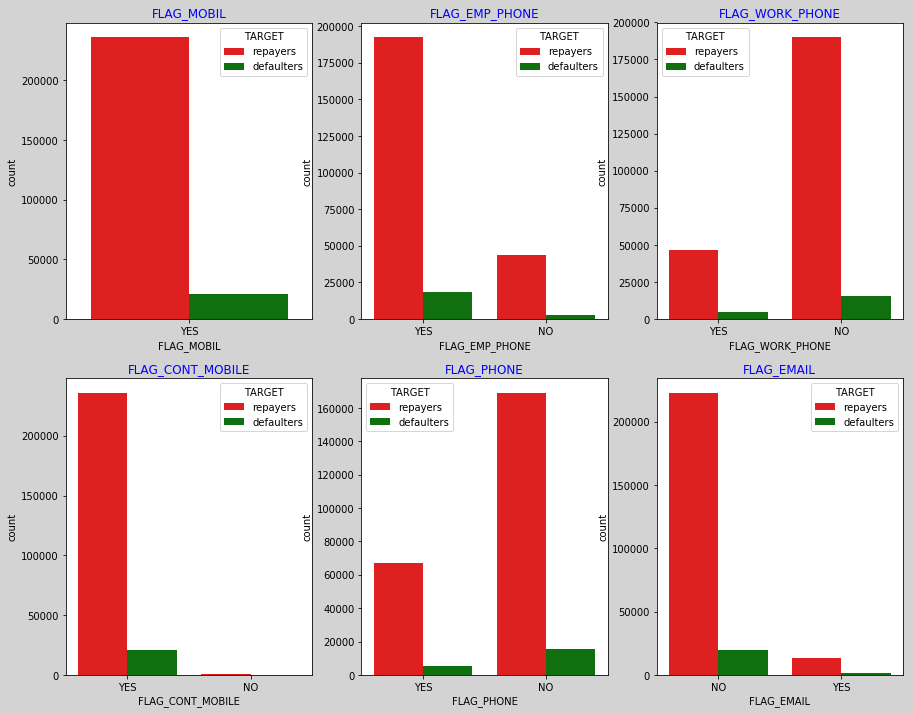

In [32]:
x   = application_train[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL',"TARGET"]]
x["TARGET"] = x["TARGET"].replace({0:"repayers",1:"defaulters"})
x  = x.replace({1:"YES",0:"NO"})

cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']
length = len(cols)

fig = plt.figure(figsize=(15,12))
fig.set_facecolor("lightgrey")

for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(2,3,j+1)
    sns.countplot(x[i],hue=x["TARGET"],palette=["r","g"])
    plt.title(i,color="b")

# Occupation percentage in data with respect to repayment status
>OCCUPATION_TYPE -	What kind of occupation does the client have.                                                                                                                                                                                             
>occupations like Cleaning staff ,Cooking staff, Drivers ,Laborers , Low-skill Laborers ,Sales staff ,Security staff are more likely to default in loans.

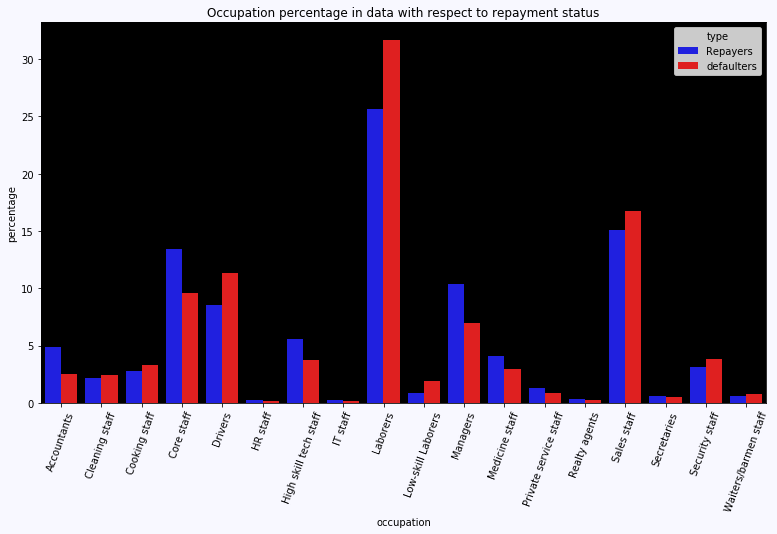

In [33]:

fig = plt.figure(figsize=(13,7))
occ = application_train[application_train["TARGET"]==0]["OCCUPATION_TYPE"].value_counts().reset_index()
occ = occ.sort_values(by = "index",ascending=True)
occ1 = application_train[application_train["TARGET"]==1]["OCCUPATION_TYPE"].value_counts().reset_index()
occ1 = occ1.sort_values(by = "index",ascending=True)
occ["percentage"]  = (occ["OCCUPATION_TYPE"]*100/occ["OCCUPATION_TYPE"].sum())
occ1["percentage"] = (occ1["OCCUPATION_TYPE"]*100/occ1["OCCUPATION_TYPE"].sum())
occ["type"]        = "Repayers"
occ1["type"]       = "defaulters"
occupation = pd.concat([occ,occ1],axis=0)

ax = sns.barplot("index","percentage",data=occupation,hue="type",palette=["b","r"])
plt.xticks(rotation = 70)
plt.xlabel("occupation")
ax.set_facecolor("k")
fig.set_facecolor("ghostwhite")
plt.title("Occupation percentage in data with respect to repayment status")
plt.show()

# Distribution of registration days for target variable.
>REGION_RATING_CLIENT - Home credit rating of the region where client lives (1,2,3).                                                                   
>REGION_RATING_CLIENT_W_CITY - Home credit rating of the region where client lives with taking city into account (1,2,3).
>Percentage of defaulters are less  in 1-rated regions compared to repayers.                                                                                                                                                                                    
>Percentage of defaulters are more in 3-rated regions compared to repayers.                                                                                                                                                                                    

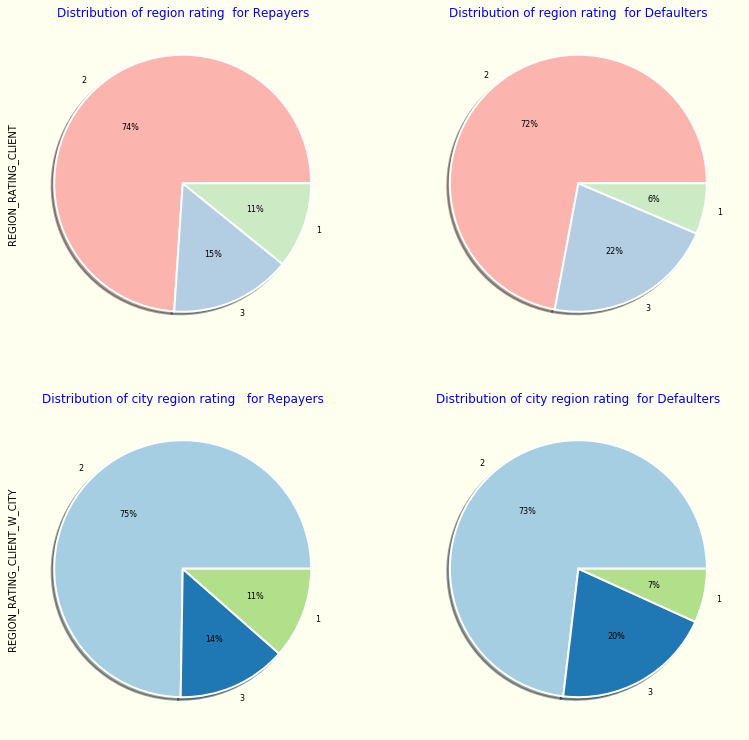

In [34]:
fig = plt.figure(figsize=(13,13))
plt.subplot(221)
application_train[application_train["TARGET"]==0]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=8,
                                                             colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of region rating  for Repayers",color="b")

plt.subplot(222)
application_train[application_train["TARGET"]==1]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=8,
                                                    colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of region rating  for Defaulters",color="b")
plt.ylabel("")

plt.subplot(223)
application_train[application_train["TARGET"]==0]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=8,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of city region rating   for Repayers",color="b")

plt.subplot(224)
application_train[application_train["TARGET"]==1]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=8,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of city region rating  for Defaulters",color="b")
plt.ylabel("")
fig.set_facecolor("ivory")

# Peak days and hours for applying loans (defaulters vs repayers)
>WEEKDAY_APPR_PROCESS_START - On which day of the week did the client apply for the loan.                                                                                                                                              
>HOUR_APPR_PROCESS_START    - Approximately at what hour did the client apply for the loan.                                                                                                                                                 
>On tuesdays , percentage of defaulters applying for loans is greater than that of repayers.                                                                                                                                                            
>from morning 4'O clock to 9'O clock percentage of defaulters applying for loans is greater than that of repayers.                                                                                                                       

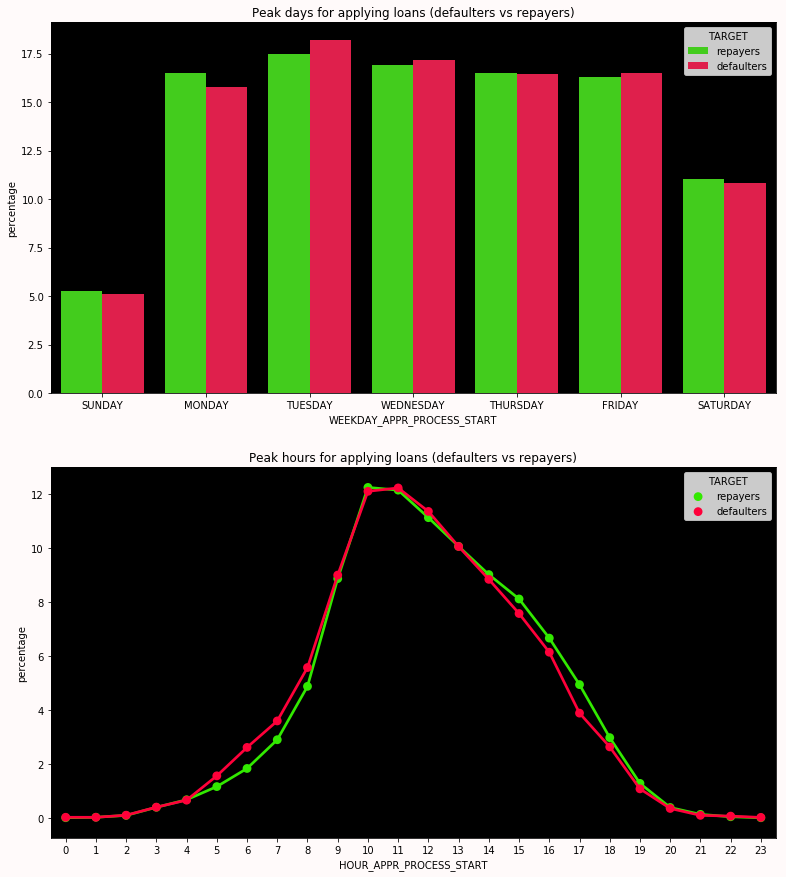

In [35]:
day = application_train.groupby("TARGET").agg({"WEEKDAY_APPR_PROCESS_START":"value_counts"})
day = day.rename(columns={"WEEKDAY_APPR_PROCESS_START":"value_counts"})
day = day.reset_index()
day_0 = day[:7]
day_1 = day[7:]
day_0["percentage"] = day_0["value_counts"]*100/day_0["value_counts"].sum()
day_1["percentage"] = day_1["value_counts"]*100/day_1["value_counts"].sum()
days = pd.concat([day_0,day_1],axis=0)
days["TARGET"] = days.replace({1:"defaulters",0:"repayers"})

fig = plt.figure(figsize=(13,15))
plt.subplot(211)
order = ['SUNDAY', 'MONDAY','TUESDAY', 'WEDNESDAY','THURSDAY', 'FRIDAY', 'SATURDAY']
ax= sns.barplot("WEEKDAY_APPR_PROCESS_START","percentage",data=days,
                hue="TARGET",order=order,palette="prism")
ax.set_facecolor("k")
ax.set_title("Peak days for applying loans (defaulters vs repayers)")

hr = application_train.groupby("TARGET").agg({"HOUR_APPR_PROCESS_START":"value_counts"})
hr = hr.rename(columns={"HOUR_APPR_PROCESS_START":"value_counts"}).reset_index()
hr_0 = hr[hr["TARGET"]==0]
hr_1 = hr[hr["TARGET"]==1]
hr_0["percentage"] = hr_0["value_counts"]*100/hr_0["value_counts"].sum()
hr_1["percentage"] = hr_1["value_counts"]*100/hr_1["value_counts"].sum()
hrs = pd.concat([hr_0,hr_1],axis=0)
hrs["TARGET"] = hrs["TARGET"].replace({1:"defaulters",0:"repayers"})
hrs = hrs.sort_values(by="HOUR_APPR_PROCESS_START",ascending=True)

plt.subplot(212)
ax1 = sns.pointplot("HOUR_APPR_PROCESS_START","percentage",
                    data=hrs,hue="TARGET",palette="prism")
ax1.set_facecolor("k")
ax1.set_title("Peak hours for applying loans (defaulters vs repayers)")
fig.set_facecolor("snow")

# Distribution in organization types for repayers and defaulters
>ORGANIZATION_TYPE - Type of organization where client works.                                                                                                
>organizations like Business Entity Type 3,Construction,Self-employed percentage of defaulters are higher than repayers.

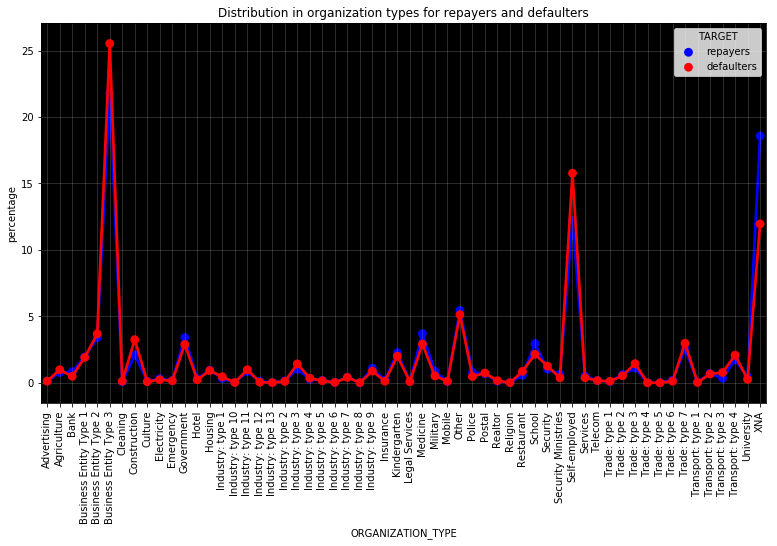

In [36]:
org = application_train.groupby("TARGET").agg({"ORGANIZATION_TYPE":"value_counts"})
org = org.rename(columns = {"ORGANIZATION_TYPE":"value_counts"}).reset_index()
org_0 = org[org["TARGET"] == 0]
org_1 = org[org["TARGET"] == 1]
org_0["percentage"] = org_0["value_counts"]*100/org_0["value_counts"].sum()
org_1["percentage"] = org_1["value_counts"]*100/org_1["value_counts"].sum()

organization = pd.concat([org_0,org_1],axis=0)
organization = organization.sort_values(by="ORGANIZATION_TYPE",ascending=True)

organization["TARGET"] = organization["TARGET"].replace({0:"repayers",1:"defaulters"})

organization
plt.figure(figsize=(13,7))
ax = sns.pointplot("ORGANIZATION_TYPE","percentage",
                   data=organization,hue="TARGET",palette=["b","r"])
plt.xticks(rotation=90)
plt.grid(True,alpha=.3)
ax.set_facecolor("k")
ax.set_title("Distribution in organization types for repayers and defaulters")
plt.show()

# Distribution of Normalized score from external data source for repayer and defaulter
>EXT_SOURCE_1	Normalized score from external data source.                                                                                                                                                                                                          
>EXT_SOURCE_2	Normalized score from external data source.                                                                                                                                                                                                           
>EXT_SOURCE_3	Normalized score from external data source.                                                                                                                                                                                                          
>Average value of normalized score from external data sources of defaulters is less than repayers.

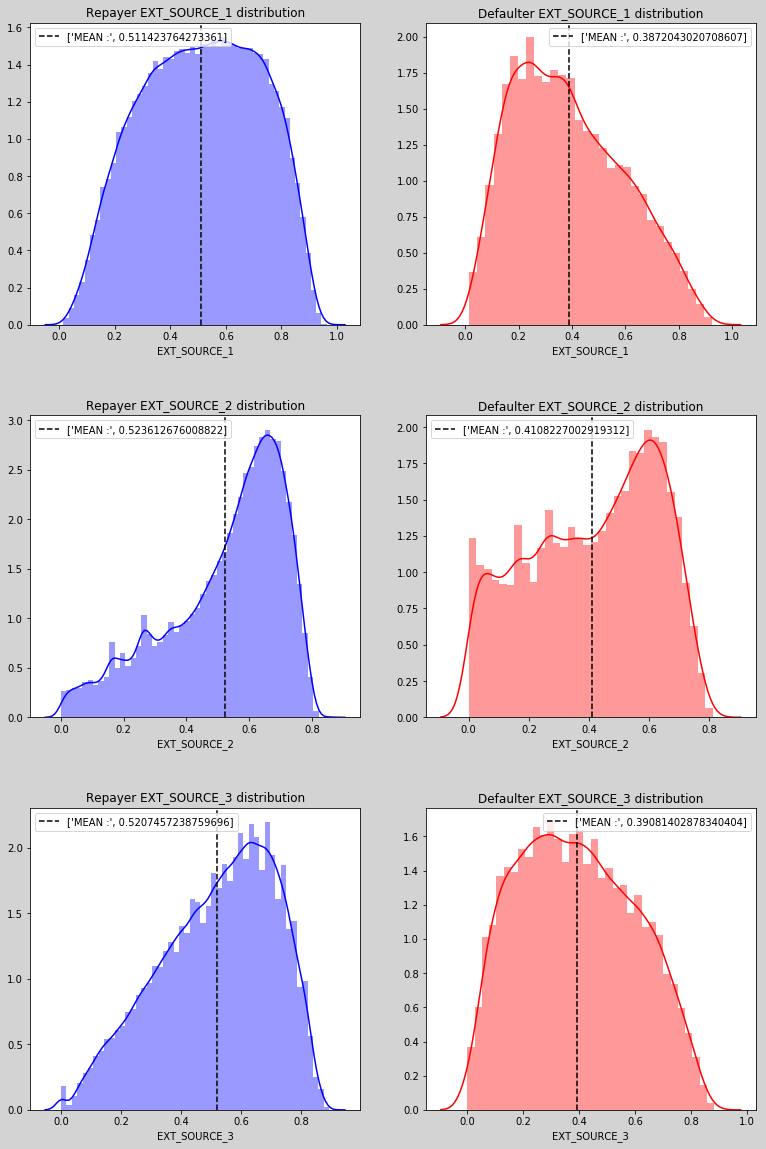

In [37]:
application_train[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]

fig = plt.figure(figsize=(13,20))

plt.subplot(321)
sns.distplot(application_train[(application_train["EXT_SOURCE_1"].notnull()) & (application_train["TARGET"] ==0 )]["EXT_SOURCE_1"],color="b")
plt.axvline(application_train[(application_train["EXT_SOURCE_1"].notnull()) & (application_train["TARGET"] ==0 )]["EXT_SOURCE_1"].mean(),
           linestyle="dashed",color="k",
           label = ["MEAN :",application_train[(application_train["EXT_SOURCE_1"].notnull()) & (application_train["TARGET"] ==0 )]["EXT_SOURCE_1"].mean()])
plt.legend(loc="best")
plt.title("Repayer EXT_SOURCE_1 distribution")

plt.subplot(322)
sns.distplot(application_train[(application_train["EXT_SOURCE_1"].notnull()) & (application_train["TARGET"] ==1 )]["EXT_SOURCE_1"],color="r")
plt.axvline(application_train[(application_train["EXT_SOURCE_1"].notnull()) & (application_train["TARGET"] ==1 )]["EXT_SOURCE_1"].mean(),
           linestyle="dashed",color="k",
           label = ["MEAN :",application_train[(application_train["EXT_SOURCE_1"].notnull()) & (application_train["TARGET"] ==1 )]["EXT_SOURCE_1"].mean()])
plt.legend(loc="best")
plt.title("Defaulter EXT_SOURCE_1 distribution")
####
plt.subplot(323)
sns.distplot(application_train[(application_train["EXT_SOURCE_2"].notnull()) & (application_train["TARGET"] ==0 )]["EXT_SOURCE_2"],color="b")
plt.axvline(application_train[(application_train["EXT_SOURCE_2"].notnull()) & (application_train["TARGET"] ==0 )]["EXT_SOURCE_2"].mean(),
           linestyle="dashed",color="k",
           label = ["MEAN :",application_train[(application_train["EXT_SOURCE_2"].notnull()) & (application_train["TARGET"] ==0 )]["EXT_SOURCE_2"].mean()])
plt.legend(loc="best")
plt.title("Repayer EXT_SOURCE_2 distribution")

plt.subplot(324)
sns.distplot(application_train[(application_train["EXT_SOURCE_2"].notnull()) & (application_train["TARGET"] ==1 )]["EXT_SOURCE_2"],color="r")
plt.axvline(application_train[(application_train["EXT_SOURCE_2"].notnull()) & (application_train["TARGET"] ==1 )]["EXT_SOURCE_2"].mean(),
           linestyle="dashed",color="k",
           label = ["MEAN :",application_train[(application_train["EXT_SOURCE_2"].notnull()) & (application_train["TARGET"] ==1 )]["EXT_SOURCE_2"].mean()])
plt.legend(loc="best")
plt.title("Defaulter EXT_SOURCE_2 distribution")

###
plt.subplot(325)
sns.distplot(application_train[(application_train["EXT_SOURCE_3"].notnull()) & (application_train["TARGET"] ==0 )]["EXT_SOURCE_3"],color="b")
plt.axvline(application_train[(application_train["EXT_SOURCE_3"].notnull()) & (application_train["TARGET"] ==0 )]["EXT_SOURCE_3"].mean(),
           linestyle="dashed",color="k",
           label = ["MEAN :",application_train[(application_train["EXT_SOURCE_3"].notnull()) & (application_train["TARGET"] ==0 )]["EXT_SOURCE_3"].mean()])
plt.legend(loc="best")
plt.title("Repayer EXT_SOURCE_3 distribution")

plt.subplot(326)
sns.distplot(application_train[(application_train["EXT_SOURCE_3"].notnull()) & (application_train["TARGET"] ==1 )]["EXT_SOURCE_3"],color="r")
plt.axvline(application_train[(application_train["EXT_SOURCE_3"].notnull()) & (application_train["TARGET"] ==1 )]["EXT_SOURCE_3"].mean(),
           linestyle="dashed",color="k",
           label = ["MEAN :",application_train[(application_train["EXT_SOURCE_3"].notnull()) & (application_train["TARGET"] ==1 )]["EXT_SOURCE_3"].mean()])
plt.legend(loc="best")
plt.title("Defaulter EXT_SOURCE_3 distribution")

plt.subplots_adjust(hspace = .3)
fig.set_facecolor("lightgrey")

# Average  Normalized information about building where the client lives.
APARTMENTS_AVG    - apartment size.                                                                                                                                                                                                                                    
BASEMENTAREA_AVG  - basement area .                                                                                                                                                                                                                                    
YEARS_BEGINEXPLUATATION_AVG - years begin expluatation .                                                                                                                                                                                                        
YEARS_BUILD_AVG - build years.                                                                                                                                                                                                                                    
COMMONAREA_AVG - common area.                                                                                                                                                                                                                                    
ELEVATORS_AVG - number of elevators.                                                                                                                                                                                                                                    
ENTRANCES_AVG -  number of entrances.                                                                                                                                                                                                                                    
FLOORSMAX_AVG -  maximum floors.                                                                                                                                                                                                                                    
FLOORSMIN_AVG - minimum floors.                                                                                                                                                                                                                                    
LANDAREA_AVG  - land area .                                                                                                                                                                                                                                    
LIVINGAPARTMENTS_AVG - living apartaents.                                                                                                                                                                                                                                    
LIVINGAREA_AVG - living area.                                                                                                                                                                                                                                    
NONLIVINGAPARTMENTS_AVG  - non living apartments.                                                                                                                                                                                                                    
NONLIVINGAREA_AVG -non living area.                                                                                                                                                                                                                                    

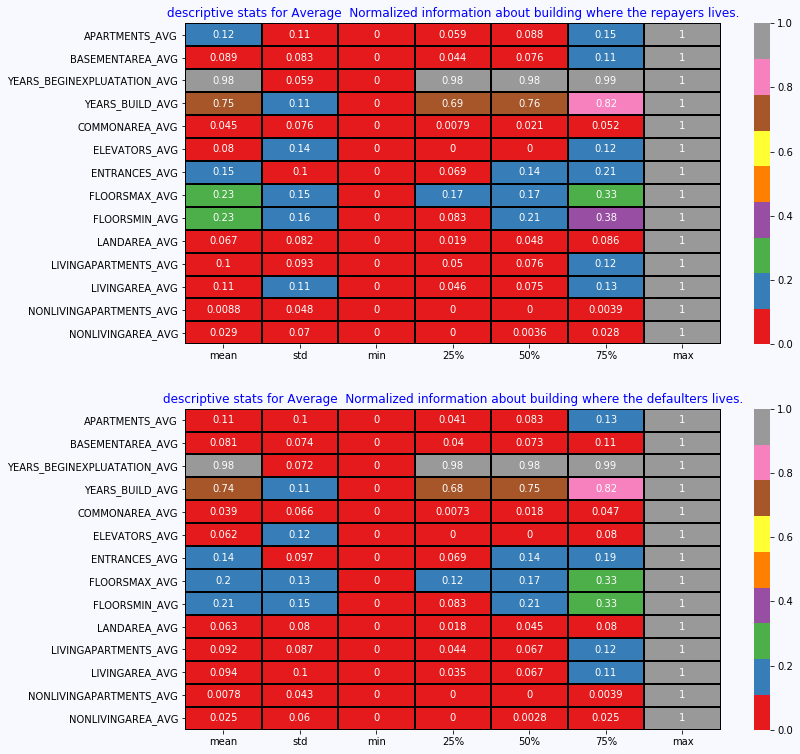

In [38]:
fig = plt.figure(figsize=(12,13))

cols = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG']

plt.subplot(211)
sns.heatmap(application_train[application_train["TARGET"] == 0][cols].describe()[1:].transpose(),
            annot=True,cmap=sns.color_palette("Set1"),
            linecolor="k",linewidth=1)
plt.title("descriptive stats for Average  Normalized information about building where the repayers lives.",color="b")

plt.subplot(212)
sns.heatmap(application_train[application_train["TARGET"] == 1][cols].describe()[1:].transpose(),
            annot=True,cmap=sns.color_palette("Set1"),
           linecolor="k",linewidth=1)
plt.title("descriptive stats for Average  Normalized information about building where the defaulters lives.",color="b")
fig.set_facecolor("ghostwhite")

# Mode Normalized information about building where the client lives.

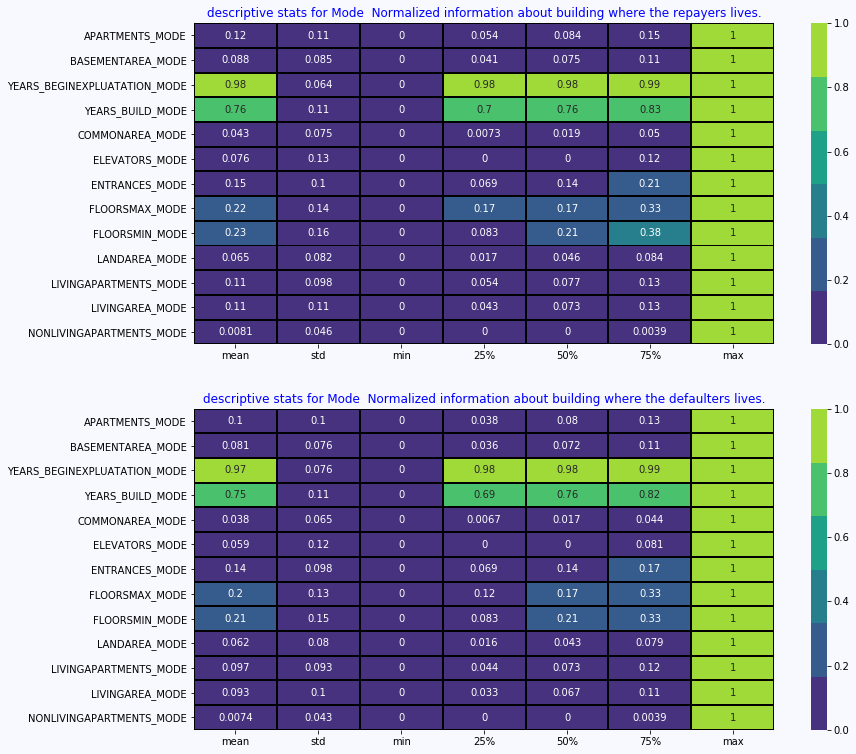

In [39]:
fig = plt.figure(figsize=(13,13))

cols1 = ['APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE']

plt.subplot(211)
sns.heatmap(application_train[application_train["TARGET"] == 0][cols1].describe()[1:].transpose(),annot=True,cmap=sns.color_palette("viridis"),
            linecolor="k",linewidth=1)
plt.title("descriptive stats for Mode  Normalized information about building where the repayers lives.",color="b")

plt.subplot(212)
sns.heatmap(application_train[application_train["TARGET"] == 1][cols1].describe()[1:].transpose(),annot=True,cmap=sns.color_palette("viridis"),
           linecolor="k",linewidth=1)
plt.title("descriptive stats for Mode  Normalized information about building where the defaulters lives.",color="b")
fig.set_facecolor("ghostwhite")

# Median Normalized information about building where the client lives.

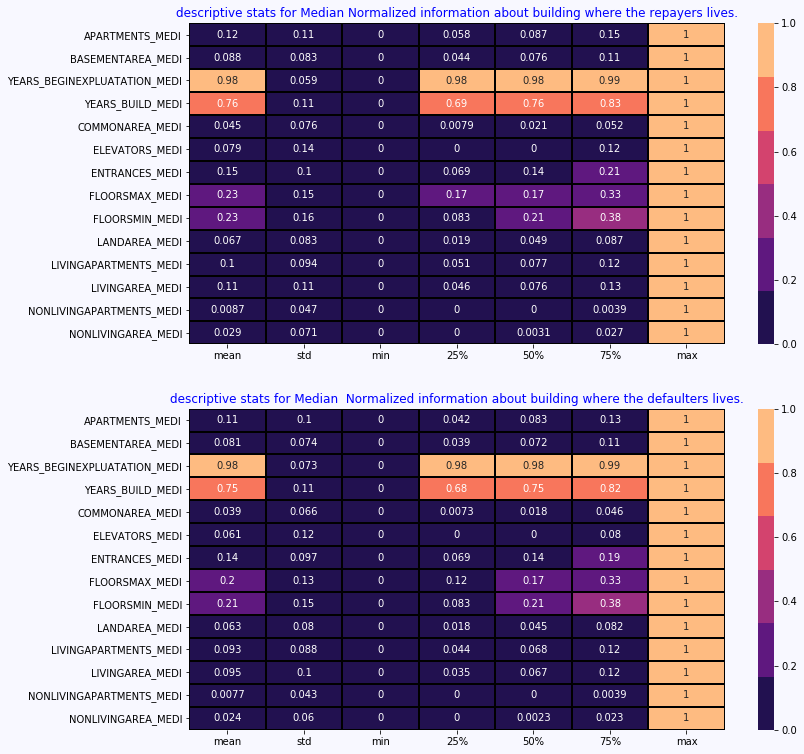

In [40]:
fig = plt.figure(figsize=(12,13))

cols2 = ['APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI']

plt.subplot(211)
sns.heatmap(application_train[application_train["TARGET"] == 0][cols2].describe()[1:].transpose(),
            annot=True,cmap=sns.color_palette("magma"),
            linecolor="k",linewidth=1)
plt.title("descriptive stats for Median Normalized information about building where the repayers lives.",color="b")

plt.subplot(212)
sns.heatmap(application_train[application_train["TARGET"] == 1][cols2].describe()[1:].transpose(),
            annot=True,cmap=sns.color_palette("magma"),
           linecolor="k",linewidth=1)
plt.title("descriptive stats for Median  Normalized information about building where the defaulters lives.",color="b")
fig.set_facecolor("ghostwhite")

# Comparing mean,standard deviation of normalized values between repayers and defaulters.
>Mean values of defaulters are slightly less than repayers.                                                                                                                                                                                                                    
>The standard deviation of  YEARS_BEGINEXPLUATATION for defaulters is higher than repayers.

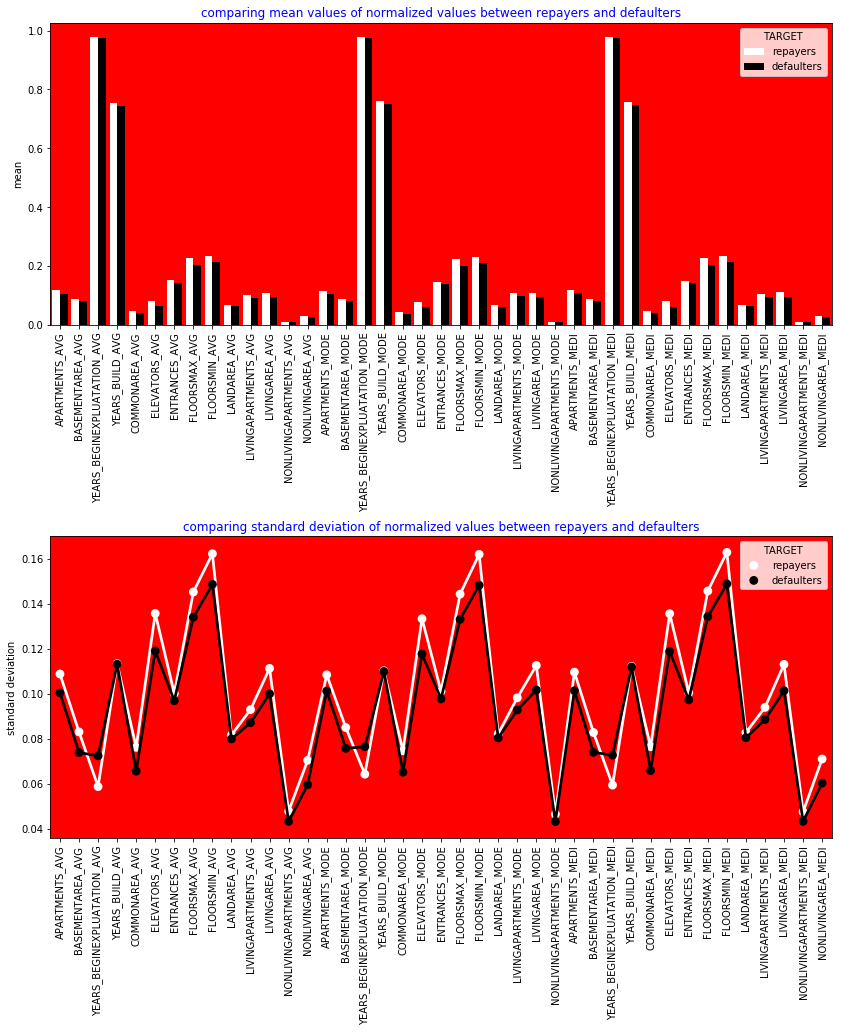

In [41]:
col = cols + cols1 +cols2

avg_mean = application_train.groupby("TARGET")[col].mean().stack().reset_index()
avg_mean["TARGET"] = avg_mean["TARGET"].replace({1:"defaulters",0:"repayers"})
avg_std = application_train.groupby("TARGET")[col].std().stack().reset_index()
avg_std["TARGET"] = avg_std["TARGET"].replace({1:"defaulters",0:"repayers"})

fig =plt.figure(figsize=(14,15))
plt.subplot(211)
ax = sns.barplot("level_1",0,data=avg_mean,hue="TARGET",palette=["white","k"])
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("mean")
plt.title("comparing mean values of normalized values between repayers and defaulters",color="b")
ax.set_facecolor("r")

plt.subplot(212)
ax1 = sns.pointplot("level_1",0,data=avg_std,hue="TARGET",palette=["white","k"])
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("standard deviation")
plt.title("comparing standard deviation of normalized values between repayers and defaulters",color="b")
ax1.set_facecolor("r")
plt.subplots_adjust(hspace = .7)


# Square plot for distribution in house attributes.


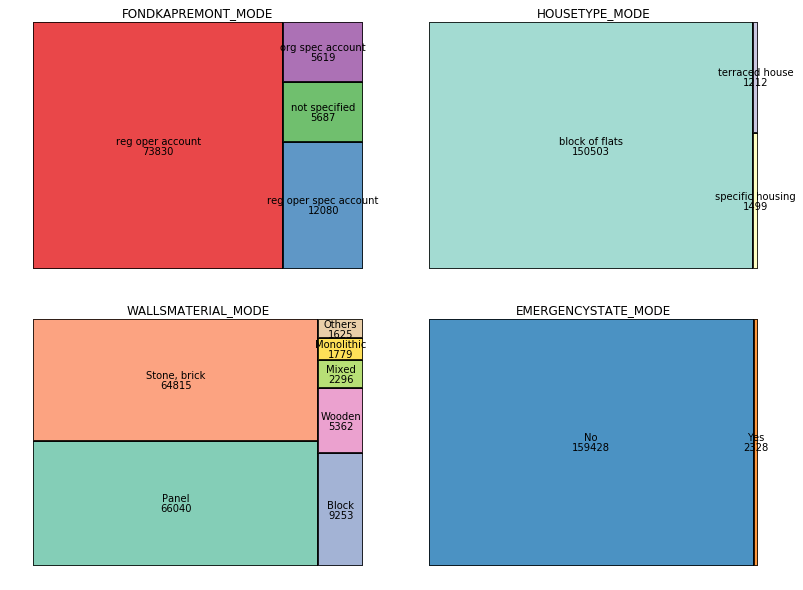

In [42]:
import squarify
cs = [ 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
length = len(cs)
pal = ["Set1","Set3","Set2"]

plt.figure(figsize=(13,10))
for i,j,k in itertools.zip_longest(cs,range(length),pal):
    plt.subplot(2,2,j+1)
    squarify.plot(sizes=data[i].value_counts().values,label=data[i].value_counts().keys(),
                  value=data[i].value_counts().values,
                  color=sns.color_palette(k),linewidth=2,edgecolor="k",alpha=.8)
    plt.title(i)
    plt.axis("off")

# Normalized average total area by house attributes and repayment status

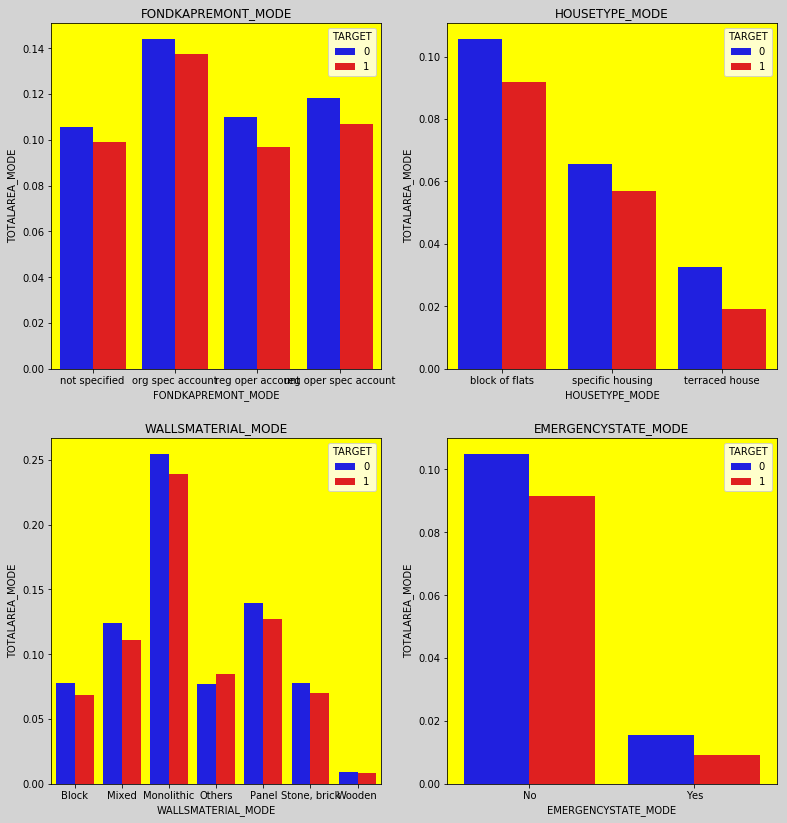

In [43]:
cs = [ 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
length = len(cs)

fig = plt.figure(figsize=(13,14))
fig.set_facecolor("lightgrey")
for i,j in itertools.zip_longest(cs,range(length)):
    plt.subplot(2,2,j+1)
    ax = sns.barplot(i,"TOTALAREA_MODE",data=application_train.groupby(["TARGET",i])["TOTALAREA_MODE"].mean().reset_index(),
                hue="TARGET",palette=["b","r"])
    ax.set_facecolor("yellow")
    plt.title(i)

# Distribution client's social surroundings with observed and defaulted 30 DPD (days past due)
>OBS_30_CNT_SOCIAL_CIRCLE- How many observation of client's social surroundings with observable 30 DPD (days past due) default.                   
>DEF_30_CNT_SOCIAL_CIRCLE-How many observation of client's social surroundings defaulted on 30 DPD (days past due) .                                     
>OBS_60_CNT_SOCIAL_CIRCLE -	How many observation of client's social surroundings with observable 60 DPD (days past due) default.                 
>DEF_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 60 (days past due) DPD.                                  

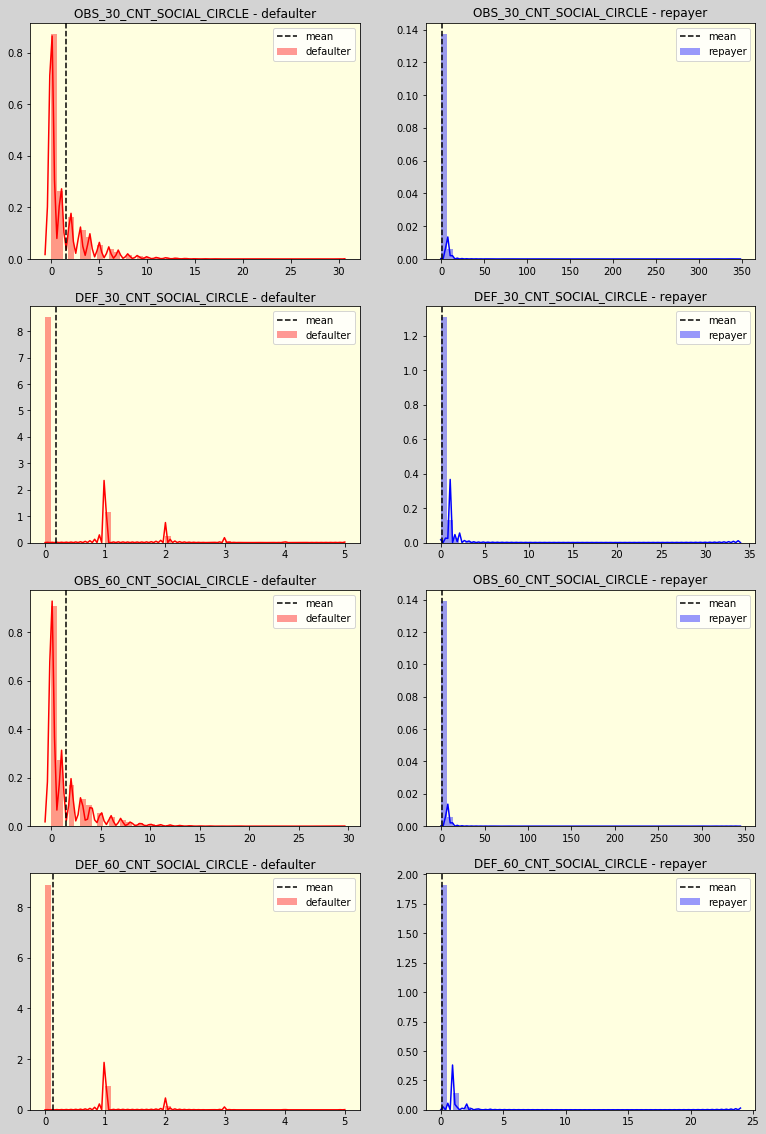

In [44]:
fig = plt.figure(figsize=(13,20))
plt.subplot(421)
ax = sns.distplot(application_train[(application_train["TARGET"] == 1 ) & (application_train["OBS_30_CNT_SOCIAL_CIRCLE"].notnull())]["OBS_30_CNT_SOCIAL_CIRCLE"],
                color="r",label="defaulter")
plt.axvline(application_train[(application_train["TARGET"] == 1 ) ]["OBS_30_CNT_SOCIAL_CIRCLE"].mean(),label="mean",color="k",linestyle="dashed")
plt.legend(loc="best")
plt.title("OBS_30_CNT_SOCIAL_CIRCLE - defaulter")
plt.xlabel("")
ax.set_facecolor("lightyellow")

plt.subplot(422)
ax = sns.distplot(application_train[(application_train["TARGET"] == 0 ) & (application_train["OBS_30_CNT_SOCIAL_CIRCLE"].notnull())]["OBS_30_CNT_SOCIAL_CIRCLE"],
                color="b",label="repayer")
plt.axvline(application_train[(application_train["TARGET"] == 0 ) ]["OBS_30_CNT_SOCIAL_CIRCLE"].mean(),label="mean",color="k",linestyle="dashed")
plt.legend(loc="best")
plt.title("OBS_30_CNT_SOCIAL_CIRCLE - repayer")
plt.xlabel("")
ax.set_facecolor("lightyellow")

plt.subplot(423)
ax = sns.distplot(application_train[(application_train["TARGET"] == 1 ) & (application_train["DEF_30_CNT_SOCIAL_CIRCLE"].notnull())]["DEF_30_CNT_SOCIAL_CIRCLE"],
                color="r",label="defaulter")
plt.axvline(application_train[(application_train["TARGET"] == 1 ) ]["DEF_30_CNT_SOCIAL_CIRCLE"].mean(),label="mean",color="k",linestyle="dashed")
plt.legend(loc="best")
plt.title("DEF_30_CNT_SOCIAL_CIRCLE - defaulter")
plt.xlabel("")
ax.set_facecolor("lightyellow")

plt.subplot(424)
ax = sns.distplot(application_train[(application_train["TARGET"] == 0 ) & (application_train["DEF_30_CNT_SOCIAL_CIRCLE"].notnull())]["DEF_30_CNT_SOCIAL_CIRCLE"],
                color="b",label="repayer")
plt.axvline(application_train[(application_train["TARGET"] == 0 ) ]["DEF_30_CNT_SOCIAL_CIRCLE"].mean(),label="mean",color="k",linestyle="dashed")
plt.legend(loc="best")
plt.title("DEF_30_CNT_SOCIAL_CIRCLE - repayer")
plt.xlabel("")
ax.set_facecolor("lightyellow")

plt.subplot(425)
ax = sns.distplot(application_train[(application_train["TARGET"] == 1 ) & (application_train["OBS_60_CNT_SOCIAL_CIRCLE"].notnull())]["OBS_60_CNT_SOCIAL_CIRCLE"],
                color="r",label="defaulter")
plt.axvline(application_train[(application_train["TARGET"] == 1 ) ]["OBS_60_CNT_SOCIAL_CIRCLE"].mean(),label="mean",color="k",linestyle="dashed")
plt.legend(loc="best")
plt.title("OBS_60_CNT_SOCIAL_CIRCLE - defaulter")
plt.xlabel("")
ax.set_facecolor("lightyellow")

plt.subplot(426)
ax = sns.distplot(application_train[(application_train["TARGET"] == 0 ) & (application_train["OBS_60_CNT_SOCIAL_CIRCLE"].notnull())]["OBS_60_CNT_SOCIAL_CIRCLE"],
                color="b",label="repayer")
plt.axvline(application_train[(application_train["TARGET"] == 0 ) ]["OBS_60_CNT_SOCIAL_CIRCLE"].mean(),label="mean",color="k",linestyle="dashed")
plt.legend(loc="best")
plt.title("OBS_60_CNT_SOCIAL_CIRCLE - repayer")
plt.xlabel("")
ax.set_facecolor("lightyellow")



plt.subplot(427)
ax = sns.distplot(application_train[(application_train["TARGET"] == 1 ) & (application_train["DEF_60_CNT_SOCIAL_CIRCLE"].notnull())]["DEF_60_CNT_SOCIAL_CIRCLE"],
                color="r",label="defaulter")
plt.axvline(application_train[(application_train["TARGET"] == 1 ) ]["DEF_60_CNT_SOCIAL_CIRCLE"].mean(),label="mean",color="k",linestyle="dashed")
plt.legend(loc="best")
plt.title("DEF_60_CNT_SOCIAL_CIRCLE - defaulter")
plt.xlabel("")
ax.set_facecolor("lightyellow")

plt.subplot(428)

ax = sns.distplot(application_train[(application_train["TARGET"] == 0 ) & (application_train["DEF_60_CNT_SOCIAL_CIRCLE"].notnull())]["DEF_60_CNT_SOCIAL_CIRCLE"],
                color="b",label="repayer")
plt.axvline(application_train[(application_train["TARGET"] == 0 ) ]["DEF_60_CNT_SOCIAL_CIRCLE"].mean(),label="mean",color="k",linestyle="dashed")
plt.legend(loc="best")
plt.title("DEF_60_CNT_SOCIAL_CIRCLE - repayer")
plt.xlabel("")
ax.set_facecolor("lightyellow")
fig.set_facecolor("lightgrey")

# Number of days before application client changed phone .
>DAYS_LAST_PHONE_CHANGE	 - How many days before application did client change phone.                                                                                                                                                    
>average days of defaulters phone change is less than average days of repayers phone change.

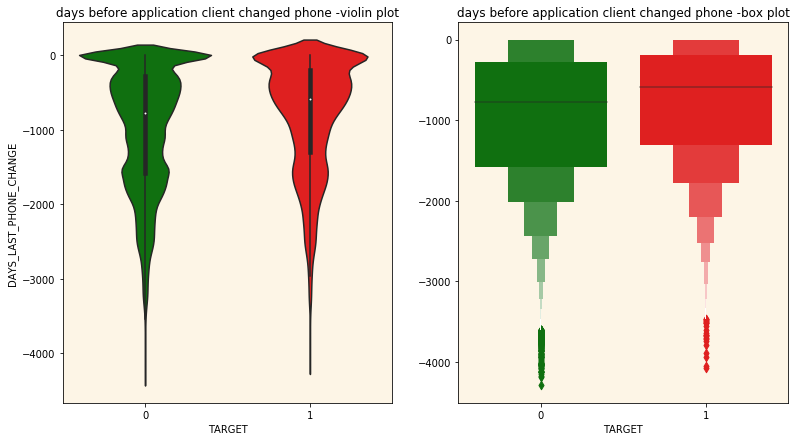

In [45]:
plt.figure(figsize=(13,7))
plt.subplot(121)
ax = sns.violinplot(application_train["TARGET"],
                    application_train["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
ax.set_facecolor("oldlace")
ax.set_title("days before application client changed phone -violin plot")
plt.subplot(122)
ax1 = sns.lvplot(application_train["TARGET"],
                 application_train["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
ax1.set_facecolor("oldlace")
ax1.set_ylabel("")
ax1.set_title("days before application client changed phone -box plot")
plt.subplots_adjust(wspace = .2)

# Documents provided by the clients.
FLAG_DOCUMENT - 	Did client provide documents.(1,0)

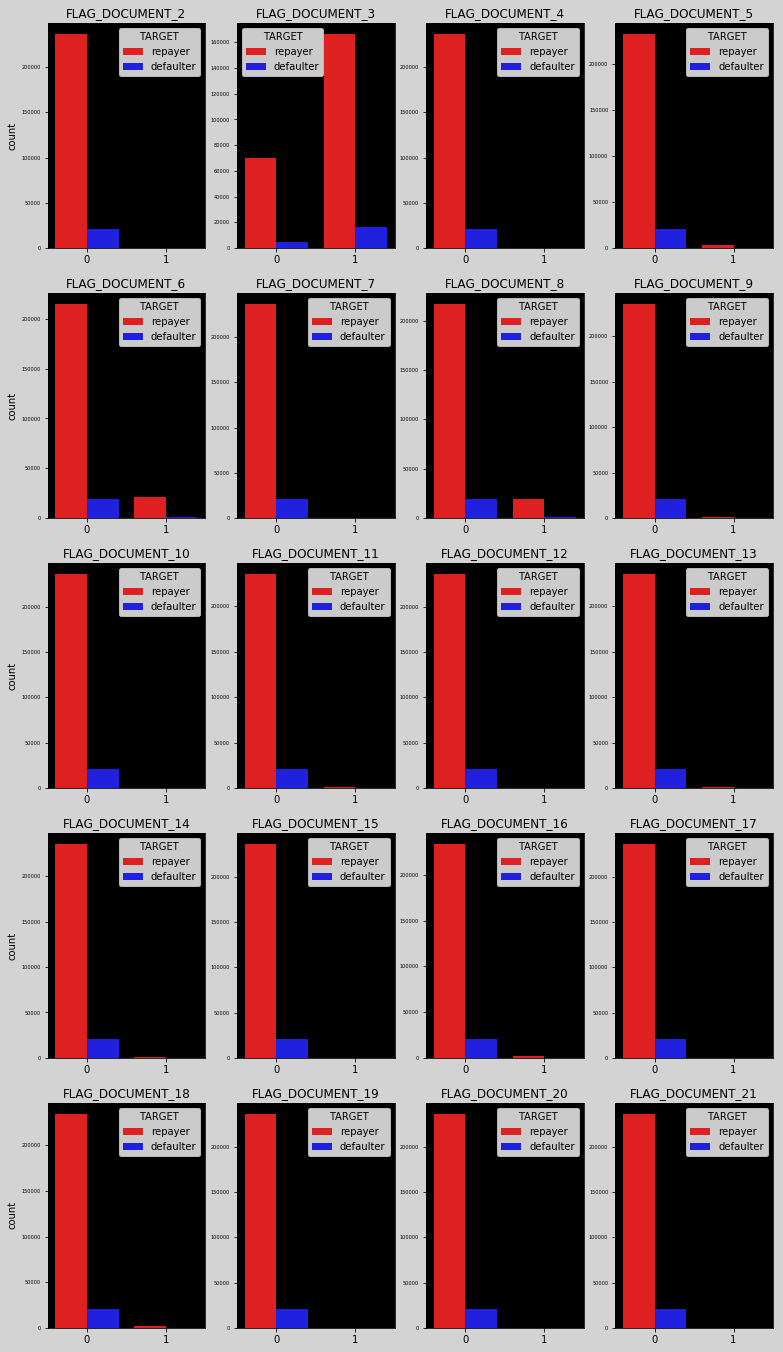

In [46]:
cols = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = application_train[cols+["TARGET"]]

length = len(cols)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"defaulter",0:"repayer"})

fig = plt.figure(figsize=(13,24))
fig.set_facecolor("lightgrey")
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","b"])
    plt.yticks(fontsize=5)
    plt.xlabel("")
    plt.title(i)
    ax.set_facecolor("k")


# Equiries to Credit Bureau about the client before application.
>AMT_REQ_CREDIT_BUREAU_HOUR	 - Number of enquiries to Credit Bureau about the client one hour before application.                                                                                                     
>AMT_REQ_CREDIT_BUREAU_DAY - 	Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application).                                   
>AMT_REQ_CREDIT_BUREAU_WEEK -	Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application).                              
>AMT_REQ_CREDIT_BUREAU_MON	- Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application).                             
>AMT_REQ_CREDIT_BUREAU_QRT	 - Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application).                              
>AMT_REQ_CREDIT_BUREAU_YEAR	 - Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application).                              


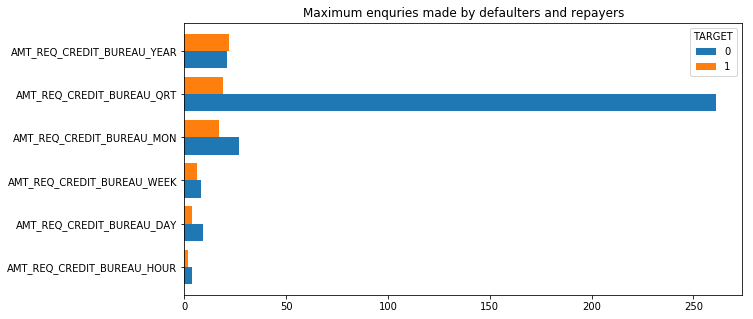

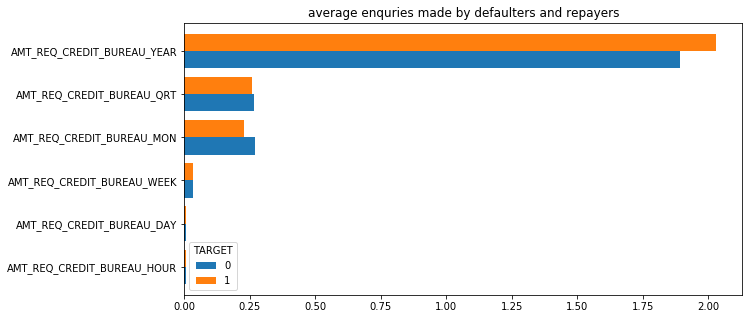

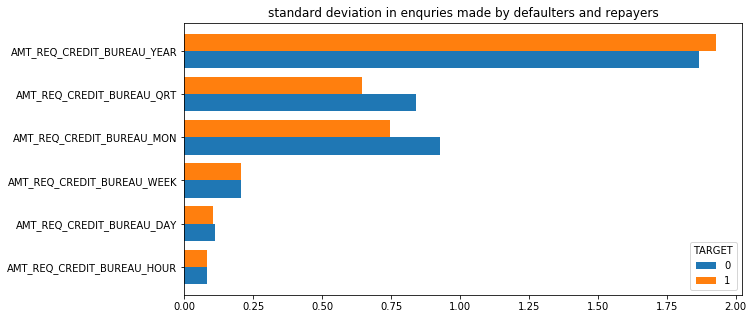

In [47]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
application_train.groupby("TARGET")[cols].max().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("Maximum enquries made by defaulters and repayers")
application_train.groupby("TARGET")[cols].mean().transpose().plot(kind="barh",
                                                                  figsize=(10,5),width=.8)
plt.title("average enquries made by defaulters and repayers")
application_train.groupby("TARGET")[cols].std().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("standard deviation in enquries made by defaulters and repayers")
plt.show()

# Credit card balances data
>AMT_BALANCE - Balance during the month of previous credit .                                                                                 
>AMT_CREDIT_LIMIT_ACTUAL - Credit card limit during the month of the previous credit.                                                                                 
>AMT_INST_MIN_REGULARITY - Minimal installment for this month of the previous credit.                                                                                 
>AMT_RECEIVABLE_PRINCIPAL - Amount receivable for principal on the previous credit.                                                                                 
>AMT_RECIVABLE - Amount receivable on the previous credit.                                                                                 
>AMT_TOTAL_RECEIVABLE - Total amount receivable on the previous credit.                                                                                      

In [48]:
application_train["type"] = "train"
application_test["type"]  = "test"
#conactenating train & test data
data = pd.concat([application_train,application_test],axis=0)

In [49]:
#Removing columns with missing values more than 40%
missing_cols = [ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"]

data_new  = data[[i for i in data.columns if i not in missing_cols]]

In [50]:
#Separating numberical and categorical columns
obj_dtypes = [i for i in data_new.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in data_new.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [51]:
#MISSING values treatment
amt_cs = ["AMT_ANNUITY","AMT_GOODS_PRICE"]
for i in amt_cs:
    data_new[i] = data_new.groupby("type").transform(lambda x:x.fillna(x.mean()))
    
enq_cs =['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for i in enq_cs:
    data_new[i] = data_new[i].fillna(0)
    
cols = ["DEF_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE",
        "OBS_60_CNT_SOCIAL_CIRCLE","NAME_TYPE_SUITE","CNT_FAM_MEMBERS",
       "DAYS_LAST_PHONE_CHANGE","DAYS_LAST_PHONE_CHANGE"]
for i in cols :
    data_new[i]  = data_new[i].fillna(data_new[i].mode()[0])

In [52]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in obj_dtypes:
    data_new[i] = le.fit_transform(data_new[i])

In [53]:
#one hot encoding for categorical variables
data_new = pd.get_dummies(data=data_new,columns=obj_dtypes)

In [54]:
#splitting new train and test data
application_train_newdf = data_new[data_new["type"] == "train"]
application_test_newdf  = data_new[data_new["type"] == "test"]

In [55]:
#splitting application_train_newdf into train and test
from sklearn.model_selection import train_test_split
train,test = train_test_split(application_train_newdf,test_size=.3,random_state = 123)

train = train.drop(columns="type",axis=1)
test  = test.drop(columns="type",axis=1)

#seperating dependent and independent variables
train_X = train[[i for i in train.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
train_Y = train[["TARGET"]]

test_X  = test[[i for i in test.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
test_Y  = test[["TARGET"]]

In [56]:
# Up-sample Minority Class
from sklearn.utils import resample

#separating majority and minority classes
df_majority = train[train["TARGET"] == 0]
df_minority = train[train["TARGET"] == 1]

#upsample minority data
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples =197969,
                                 random_state=123)

df_upsampled = pd.concat([df_majority,df_minority_upsampled],axis=0)

#splitting dependent and independent variables
df_upsampled_X = df_upsampled[[i for i in df_upsampled.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
df_upsampled_Y = df_upsampled[["TARGET"]]

In [57]:
# Down-sample Majority Class
from sklearn.utils import resample

#separating majority and minority classes
df_majority = train[train["TARGET"] == 0]
df_minority = train[train["TARGET"] == 1]

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=17288,
                                   random_state=123)

df_downsampled = pd.concat([df_minority,df_majority_downsampled],axis=0)

#splitting dependent and independent variables

df_downsampled_X = df_downsampled[[i for i in df_downsampled.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
df_downsampled_Y = df_downsampled[["TARGET"]]

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc

#Model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    print (algorithm)
    
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    ax.set_facecolor("k")


# LogisticRegression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Accuracy score :  0.78287208429337
Recall score   :  0.1157167530224525
classification report :
               precision    recall  f1-score   support

         0.0       0.83      0.93      0.88     63358
         1.0       0.26      0.12      0.16     13896

   micro avg       0.78      0.78      0.78     77254
   macro avg       0.55      0.52      0.52     77254
weighted avg       0.73      0.78      0.75     77254



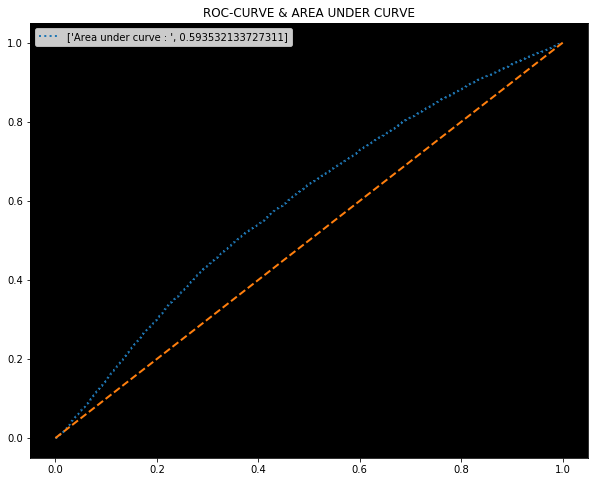

In [59]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
model(logit,df_downsampled_X,df_downsampled_Y,test_X,test_Y,df_downsampled_X.columns)

# Random Forest Classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy score :  0.7126362389002511
Recall score   :  0.11978281397544854
classification report :
               precision    recall  f1-score   support

         0.0       0.74      0.94      0.83     56074
         1.0       0.42      0.12      0.19     21180

   micro avg       0.71      0.71      0.71     77254
   macro avg       0.58      0.53      0.51     77254
weighted avg       0.65      0.71      0.65     77254



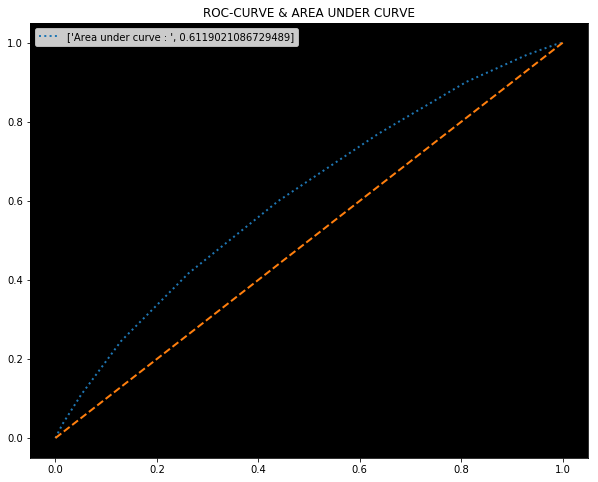

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model(rfc,df_downsampled_X,df_downsampled_Y,test_X,test_Y,df_downsampled_X.columns)

# Decision Tree Classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy score :  0.5717503300799959
Recall score   :  0.09450120192307693
classification report :
               precision    recall  f1-score   support

         0.0       0.58      0.93      0.71     43974
         1.0       0.52      0.09      0.16     33280

   micro avg       0.57      0.57      0.57     77254
   macro avg       0.55      0.51      0.44     77254
weighted avg       0.55      0.57      0.47     77254



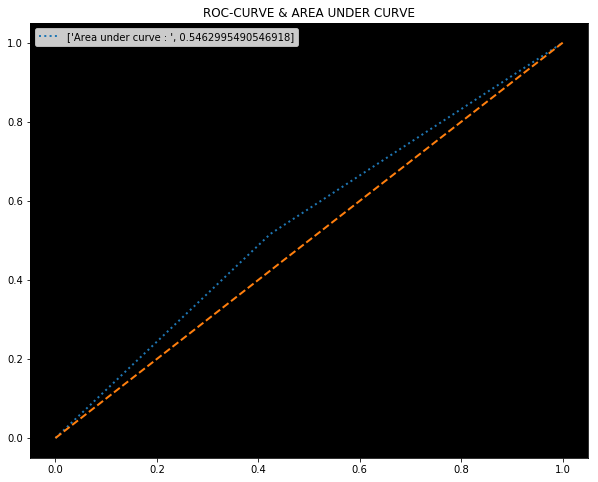

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model(dtc,df_downsampled_X,df_downsampled_Y,test_X,test_Y,df_downsampled_X.columns)

# Gaussian Naive Bayes

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy score :  0.47530224972169727
Recall score   :  0.09874874758254305
classification report :
               precision    recall  f1-score   support

         0.0       0.46      0.95      0.62     34337
         1.0       0.70      0.10      0.17     42917

   micro avg       0.48      0.48      0.48     77254
   macro avg       0.58      0.52      0.39     77254
weighted avg       0.59      0.48      0.37     77254



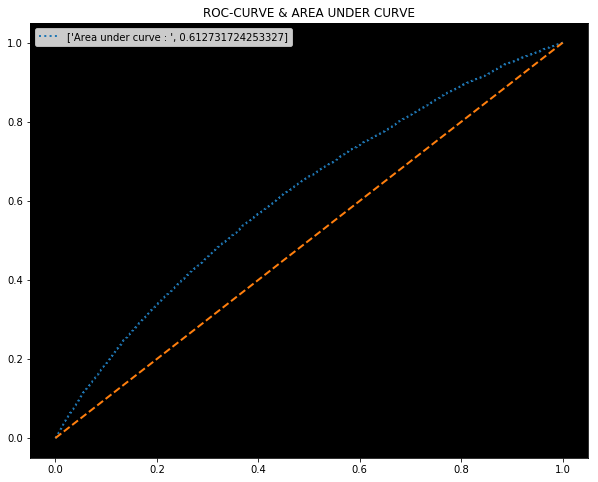

In [62]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model(gnb,df_downsampled_X,df_downsampled_Y,test_X,test_Y,df_downsampled_X.columns)

# XGBoost Classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
Accuracy score :  0.7116783596965853
Recall score   :  0.14162310622840435
classification report :
               precision    recall  f1-score   support

         0.0       0.73      0.95      0.82     54680
         1.0       0.52      0.14      0.22     22574

   micro avg       0.71      0.71      0.71     77254
   macro avg       0.63      0.54      0.52     77254
weighted avg       0.67      0.71      0.65     77254



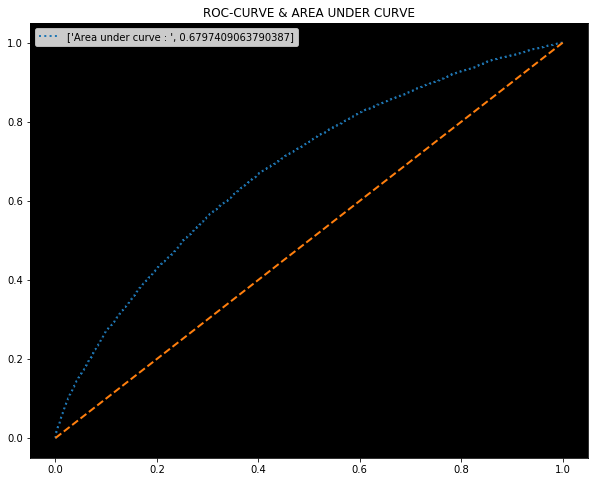

In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model(xgb,df_downsampled_X,df_downsampled_Y,test_X,test_Y,df_downsampled_X.columns)

# Gradient Boosting Classifier

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Accuracy score :  0.7126750718409403
Recall score   :  0.14143843242039636
classification report :
               precision    recall  f1-score   support

         0.0       0.73      0.95      0.82     54799
         1.0       0.52      0.14      0.22     22455

   micro avg       0.71      0.71      0.71     77254
   macro avg       0.63      0.54      0.52     77254
weighted avg       0.67      0.71      0.65     77254



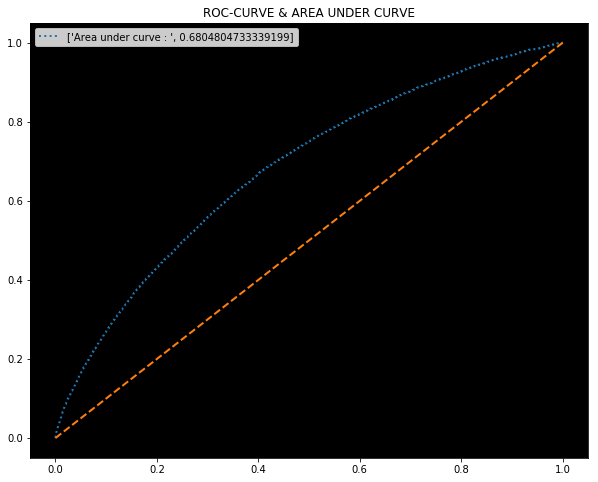

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model(gbc,df_downsampled_X,df_downsampled_Y,test_X,test_Y,df_downsampled_X.columns)

In [76]:
test_sub_X = application_test_newdf[[i for i in df_downsampled.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
logit = LogisticRegression()

logit.fit(df_downsampled_X,df_downsampled_Y)
sub_prob = logit.predict_proba(test_sub_X)[:,1]
#sub_prob = pd.DataFrame(sub_prob)
ids = application_test[["SK_ID_CURR"]]
df = pd.DataFrame(ids) 
df2 = df.assign(TARGET = sub_prob) 

#subm  = ids.merge(sub_prob,left_index=True,right_index=True,how="left")
sample_submission  = df2.rename(columns={"SK_ID_CURR":'SK_ID_CURR','TARGET':'TARGET'})

In [78]:
sample_submission.head()

,SK_ID_CURR,TARGET
0,100002,0.461158
1,100003,0.438067
2,100004,0.462223
3,100006,0.515282
4,100007,0.450044


In [79]:
sample_submission.to_csv('logit.csv', index=False)
 